# BT4012 Group 7 Project Code

## Data Preparation

In [ ]:
# Packages to install
!pip install numpy
!pip install urllib3
!pip install tldextract
!pip install matplotlib==3.5.0
!pip install bayesian-optimization
!pip install scikeras
!pip install --upgrade numpy
!pip install hyperopt==0.2.7
!pip install xgboost==1.2.0
!pip install scikit-learn==1.0.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 93 kB 2.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 6.5 MB/s 
     |████████████████████████████████| 42 kB 1.4 MB/s 
     |████████████████████████████████| 965 kB 46.8 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 7.6 MB/s 
     |████████████████████████████████| 200 kB 58.3 MB/s 
  Attempting uninstall: hyperopt
    Found existing installation: hyperopt 0.1.2
    Uninstalling hyperopt-0.1.2:
      Successfully uninstalled hyperopt-0.1.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 148.9 MB 41 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90
Looking in indexes:

In [ ]:
# Import packages
import string
import pandas as pd
from urllib.parse import urlparse
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import pickle # to save models and results

# heuristic 6
import re
import socket

# heuristic 9
import tldextract

# heuristic 10
import urllib
from urllib.parse import urlparse
import regex as re
import json
from sklearn import linear_model, metrics, preprocessing
from sklearn.metrics import confusion_matrix

# heuristic 11
from sklearn.preprocessing import OneHotEncoder

# heuristic 15
from math import log

# y label encoding
from sklearn.preprocessing import LabelEncoder

# SelectKBest Pipelining
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import RepeatedStratifiedKFold

# model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, make_scorer

import keras
import tensorflow
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax
from keras.callbacks import EarlyStopping, ModelCheckpoint
from scikeras.wrappers import KerasClassifier
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from keras.models import Sequential
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization

In [ ]:
# This cell contains helper functions to save tuning results.
# Please change the path depending on where you want to save/load to pickle file

path = '/content/drive/MyDrive/G7_Code_Files/Tuning'

def save_file(filename, data):
    output = open(path + '/' + filename, 'wb')
    pickle.dump(data, output)
    output.close()

def load_file(filename):
    pkl_file = open(path + '/' + filename, 'rb')
    data = pickle.load(pkl_file)
    pkl_file.close()
    return data

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Helper function to plot the duplicates grouped bar chart

def plot_dup_gbc(x_labels, first_bar_values, second_bar_values, plot_title):
  x = np.arange(len(x_labels))  # the label locations
  width = 0.35  # the width of the bars

  fig, ax = plt.subplots(figsize=(15,10))
  rects1 = ax.bar(x - width/2, first_bar_values, width, label="Total")
  rects2 = ax.bar(x + width/2, second_bar_values, width, label='Duplicated')

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel("Number of URLs")
  ax.set_title(plot_title)
  ax.set_xticks(x, x_labels)
  ax.legend()

  ax.bar_label(rects1, padding=3)
  ax.bar_label(rects2, padding=3)

  #fig.tight_layout()

  plt.show()

In [ ]:
# set the random seed to make the experiment reproducible 
random_seed = 1
#np.random.seed(1)
np.random.RandomState(random_seed)

RandomState(MT19937) at 0x7F859CF0AE20

Read in dataset A and dataset B, upload both csv files into runtime

In [ ]:
dfA = pd.read_csv("/content/drive/MyDrive/G7_Code_Files/malicious_phish.csv")
dfB = pd.read_csv("/content/drive/MyDrive/G7_Code_Files/phishing_site_urls.csv")

In [ ]:
print(f"There are {len(dfA)} URLs in dataset A" )
print(f"There are {len(dfB)} URLs in dataset B" )
print(f"There are {len(dfA[dfA['type'] == 'phishing'])} phishing URLs in dataset A" )
print(f"There are {len(dfA[dfA['type'] == 'benign'])} benign URLs in dataset A" )
print(f"There are {len(dfB[dfB['Label'] == 'bad'])} phishing URLs in dataset B" )
print(f"There are {len(dfB[dfB['Label'] == 'good'])} benign URLs in dataset B" )

There are 651191 URLs in dataset A
There are 549346 URLs in dataset B
There are 94111 phishing URLs in dataset A
There are 428103 benign URLs in dataset A
There are 156422 phishing URLs in dataset B
There are 392924 benign URLs in dataset B


The columns in dataset A are: ['url' 'type']
There are 651191 rows in dataset A
The types of urls are: ['phishing' 'benign' 'defacement' 'malware']


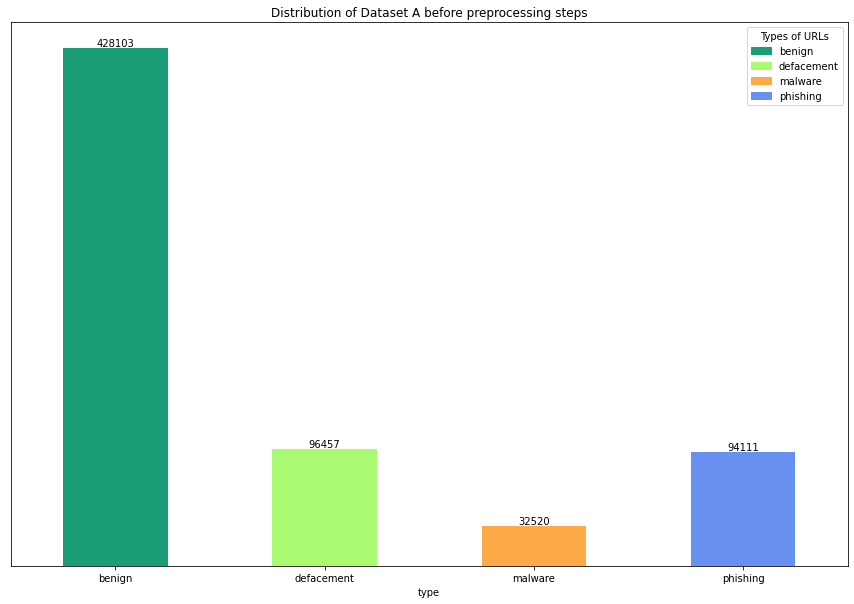

In [ ]:
# Distribution of the Dataset A
colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0']
c = dfA.groupby("type").count()
c = c.rename(columns={"url": "count"}).reset_index()
plot = c.plot.bar(x="type", y="count", figsize=(15,10), rot=0, color=colors, title="Distribution of Dataset A before preprocessing steps")
plot.bar_label(plot.containers[0])
# map names to colors
cmap = dict(zip(c["count"], colors))

# create the rectangles for the legend
patches = [Patch(color=v, label=k) for k, v in cmap.items()]
plt.legend(title='Types of URLs', labels=('benign', 'defacement', 'malware', 'phishing'), handles = patches, loc='upper right',)
plot.axes.get_yaxis().set_visible(False)
print(f'The columns in dataset A are: {dfA.columns.values}')
print(f'There are {dfA.shape[0]} rows in dataset A')
print(f'The types of urls are: {dfA["type"].unique()}')

The columns in dataset B are: ['URL' 'Label']
There are 549346 rows in dataset A
The types of urls are: ['bad' 'good']
The ratio of good to bad urls is 2.511948447149378


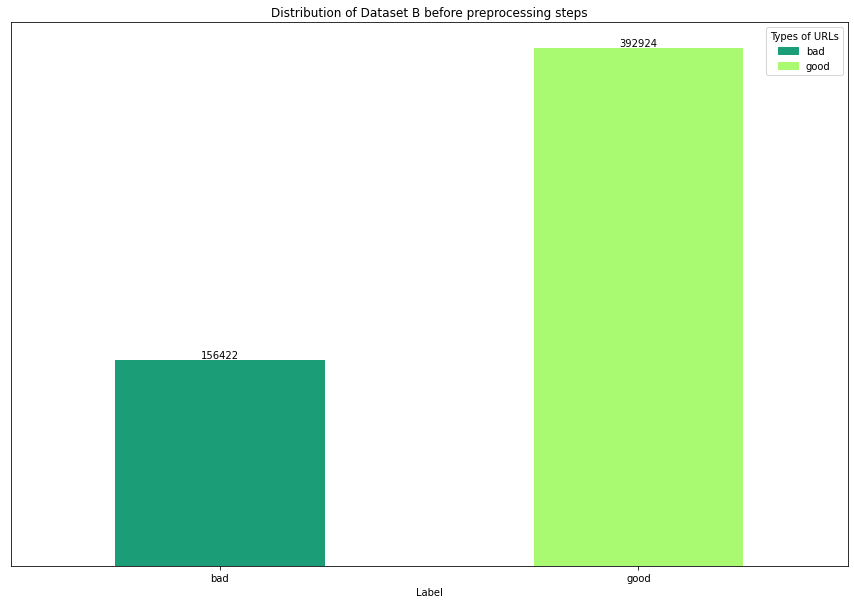

In [ ]:
# Distribution of Dataset B
colors = ['#1b9e77', '#a9f971']
c = dfB.groupby("Label").count()
c = c.rename(columns={"URL": "count"}).reset_index()
plot = c.plot.bar(x="Label", y="count", figsize=(15,10), rot=0, color=colors, title='Distribution of Dataset B before preprocessing steps')
plot.bar_label(plot.containers[0])
# map names to colors
cmap = dict(zip(c["count"], colors))

# create the rectangles for the legend
patches = [Patch(color=v, label=k) for k, v in cmap.items()]
plt.legend(title='Types of URLs', labels=('bad', 'good'), handles = patches, loc='upper right')
plot.axes.get_yaxis().set_visible(False)
ratio_good_bad = c[c["Label"] == 'good']['count'].values[0] / c[c["Label"] == 'bad']['count'].values[0]

print(f'The columns in dataset B are: {dfB.columns.values}')
print(f'There are {dfB.shape[0]} rows in dataset A')
print(f'The types of urls are: {dfB["Label"].unique()}')
print(f'The ratio of good to bad urls is {ratio_good_bad}')

Understanding the datasets individually before combining

Count and drop duplicates within each dataset

In [ ]:
#Check if there are duplicates and drop them if present
count_duplicates_dfA = len(dfA['url']) - len(dfA['url'].drop_duplicates())
print(f"There are {count_duplicates_dfA} duplicates within dataset A")
dfA = dfA.drop_duplicates(subset='url')
count_duplicates_dfB = len(dfB['URL']) - len(dfB['URL'].drop_duplicates())
print(f"There are {count_duplicates_dfB} duplicates within dataset B")
dfB = dfB.drop_duplicates(subset='URL')
print("Duplicates have been dropped")

There are 10072 duplicates within dataset A
There are 42151 duplicates within dataset B
Duplicates have been dropped


Dataset A has two columns - URL and Type. There are 641119 urls. These urls are categorized into 4 categories - phishing, benign, defacement, malware - of which we are only interested in benign and phishing. 


The columns in dataset A are: ['url' 'type']
There are 641119 rows in dataset A
The types of urls are: ['phishing' 'benign' 'defacement' 'malware']


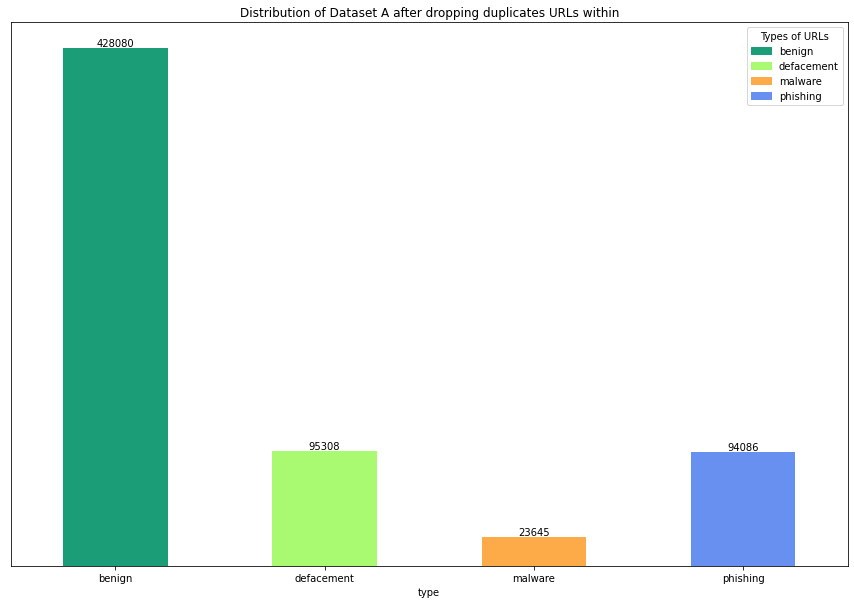

In [ ]:
# Distribution of the Dataset A
colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0']
c = dfA.groupby("type").count()
c = c.rename(columns={"url": "count"}).reset_index()
plot = c.plot.bar(x="type", y="count", figsize=(15,10), rot=0, color=colors, title='Distribution of Dataset A after dropping duplicates URLs within')
plot.bar_label(plot.containers[0])
# map names to colors
cmap = dict(zip(c["count"], colors))

# create the rectangles for the legend
patches = [Patch(color=v, label=k) for k, v in cmap.items()]
plt.legend(title='Types of URLs', labels=('benign', 'defacement', 'malware', 'phishing'), handles = patches, loc='upper right',)
plot.axes.get_yaxis().set_visible(False)

print(f'The columns in dataset A are: {dfA.columns.values}')
print(f'There are {dfA.shape[0]} rows in dataset A')
print(f'The types of urls are: {dfA["type"].unique()}')

Dataset B has two columns - URL and Label. There are 507195 urls. These urls are categorized into 2 categories - good (not phishing) and bad (phishing). The ratio of good to bad urls is ~3.4. This means that for every 1 bad url, there are 3.4 good urls. 

The columns in dataset B are: ['URL' 'Label']
There are 507195 rows in dataset A
The types of urls are: ['bad' 'good']
The ratio of good to bad urls is 3.4374792209837444


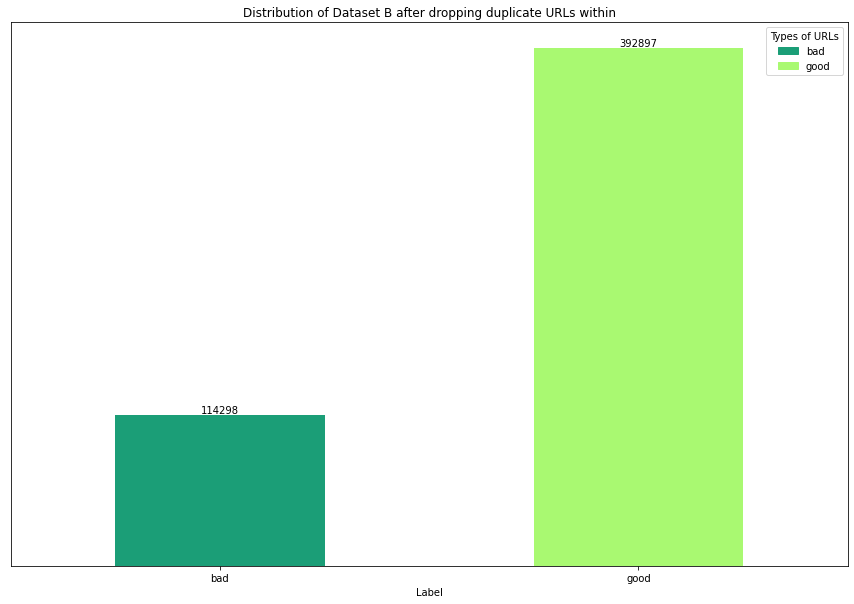

In [ ]:
# Distribution of Dataset B
colors = ['#1b9e77', '#a9f971']
c = dfB.groupby("Label").count()
c = c.rename(columns={"URL": "count"}).reset_index()
plot = c.plot.bar(x="Label", y="count", figsize=(15,10), rot=0, color=colors, title= 'Distribution of Dataset B after dropping duplicate URLs within')
plot.bar_label(plot.containers[0])

# map names to colors
cmap = dict(zip(c["count"], colors))

# create the rectangles for the legend
patches = [Patch(color=v, label=k) for k, v in cmap.items()]
plt.legend(title='Types of URLs', labels=('bad', 'good'), handles = patches, loc='upper right',)
plot.axes.get_yaxis().set_visible(False)
ratio_good_bad = c[c["Label"] == 'good']['count'].values[0] / c[c["Label"] == 'bad']['count'].values[0]

print(f'The columns in dataset B are: {dfB.columns.values}')
print(f'There are {dfB.shape[0]} rows in dataset A')
print(f'The types of urls are: {dfB["Label"].unique()}')
print(f'The ratio of good to bad urls is {ratio_good_bad}')

Filter dfA for the labels we want and standardize labels to 0 and 1

In [ ]:
# Filter out the malware, defacement URLs from Dataset A
dfA_legitimate_phishing = dfA.loc[(dfA["type"] == "phishing") | (dfA["type"] == "benign"),:] # dataset contains either phishing or benign

#standardize labels for non-phishing URLs to be 0 and phishing URLs to be 1 across dfA and dfB

dfA_legitimate_phishing.loc[dfA_legitimate_phishing['type'] == 'phishing', "type"] = 1
dfA_legitimate_phishing.loc[dfA_legitimate_phishing['type'] == 'benign', "type"] = 0

dfB.loc[dfB['Label'] == 'good', 'Label'] = 0
dfB.loc[dfB['Label'] == 'bad', 'Label'] = 1


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


Make a df of common urls as well as how dfA and dfB labels them

In [ ]:
common_urls_df = pd.merge(dfA_legitimate_phishing, dfB,  how='inner', left_on="url", right_on="URL")
common_urls_df = common_urls_df.rename(columns={'type': 'dfA_label', 'Label': 'dfB_label'})
common_urls_df = common_urls_df[['url', 'dfA_label', 'dfB_label']]
common_urls_df

,url,dfA_label,dfB_label
0,mp3raid.com/music/krizz_kaliko.html,0,0
1,bopsecrets.org/rexroth/cr/1.htm,0,0
2,espn.go.com/nba/player/_/id/3457/brandon-rush,0,0
3,yourbittorrent.com/?q=anthony-hamilton-soulife,0,0
4,allmusic.com/album/crazy-from-the-heat-r16990,0,0
...,...,...,...
440792,xbox360.ign.com/objects/850/850402.html,1,0
440793,games.teamxbox.com/xbox-360/1860/Dead-Space/,1,0
440794,www.gamespot.com/xbox360/action/deadspace/,1,0
440795,en.wikipedia.org/wiki/Dead_Space_(video_game),1,0


Find the URLs with conflicting labels. There are 95,997 of them which we will drop since we cannot ascertain which is the correct label.

In [ ]:
conflicting_urls_df = common_urls_df[common_urls_df['dfA_label'] != common_urls_df['dfB_label']]
conflicting_urls_df
conflicting_urls = list(conflicting_urls_df['url'].values)
print(len(conflicting_urls))

95997


In [ ]:
dfA_legitimate_phishing = dfA_legitimate_phishing[~dfA_legitimate_phishing['url'].isin(conflicting_urls)]
dfB = dfB[~dfB['URL'].isin(conflicting_urls)]

There are 426169 rows in dataset A


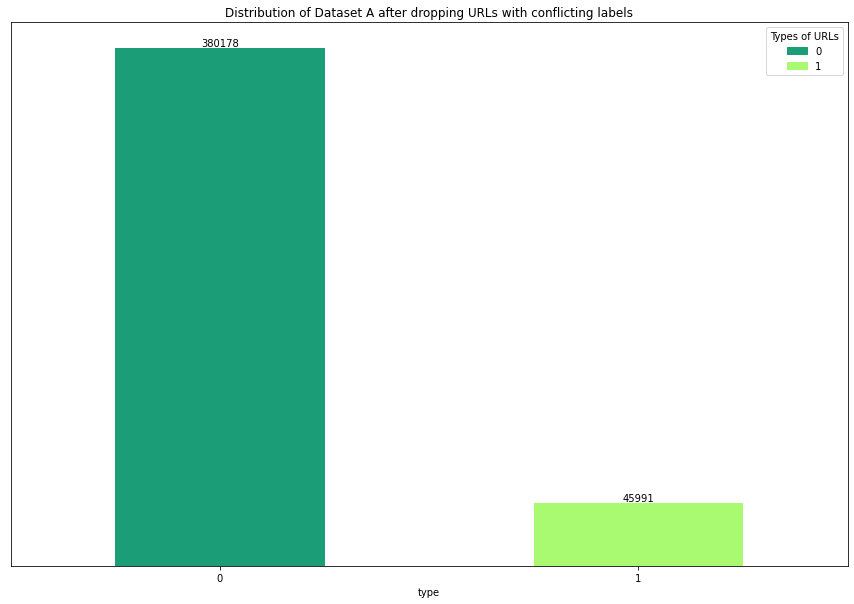

In [ ]:
# Distribution of the dfA_legitimate_phishing after dropping URLs with conflicting labels 
colors = ['#1b9e77', '#a9f971']
c = dfA_legitimate_phishing.groupby("type").count()
c = c.rename(columns={"url": "count"}).reset_index()
plot = c.plot.bar(x="type", y="count", figsize=(15,10), rot=0, color=colors, title="Distribution of Dataset A after dropping URLs with conflicting labels")
plot.bar_label(plot.containers[0])
# map names to colors
cmap = dict(zip(c["count"], colors))

# create the rectangles for the legend
patches = [Patch(color=v, label=k) for k, v in cmap.items()]
plt.legend(title='Types of URLs', labels=('0','1'), handles = patches, loc='upper right',)
plot.axes.get_yaxis().set_visible(False)

print(f'There are {dfA_legitimate_phishing.shape[0]} rows in dataset A')


There are 411198 rows in dataset B
The ratio of good to bad urls is 5.193114043014639


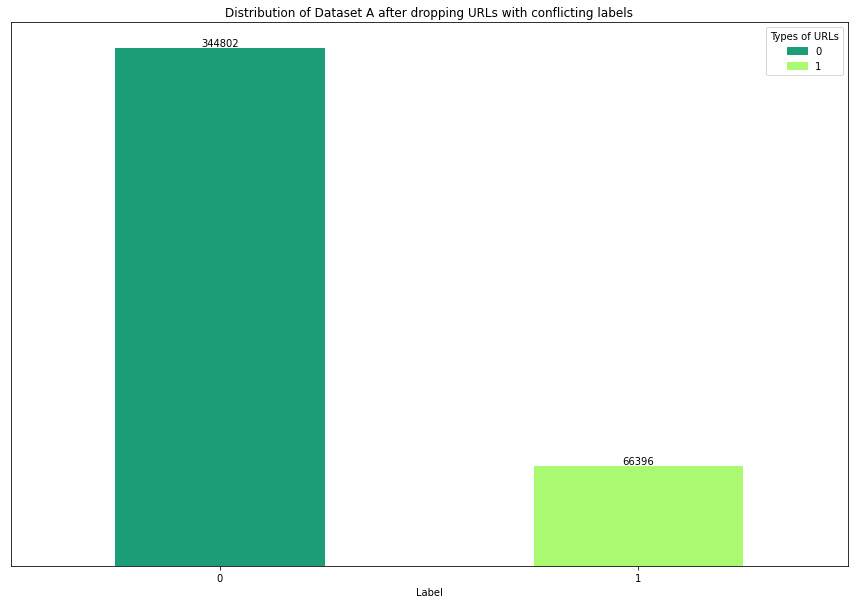

In [ ]:
# Distribution of Dataset B after dropping URLs with conflicting labels
colors = ['#1b9e77', '#a9f971']
c = dfB.groupby("Label").count()
c = c.rename(columns={"URL": "count"}).reset_index()
plot = c.plot.bar(x="Label", y="count", figsize=(15,10), rot=0, color=colors, title="Distribution of Dataset A after dropping URLs with conflicting labels")
plot.bar_label(plot.containers[0])
# map names to colors
cmap = dict(zip(c["count"], colors))

# create the rectangles for the legend
patches = [Patch(color=v, label=k) for k, v in cmap.items()]
plt.legend(title='Types of URLs', labels=('0','1'), handles = patches, loc='upper right',)
plot.axes.get_yaxis().set_visible(False)
ratio_good_bad = c[c["Label"] == 0]['count'].values[0] / c[c["Label"] == 1]['count'].values[0]

print(f'There are {dfB.shape[0]} rows in dataset B')
print(f'The ratio of good to bad urls is {ratio_good_bad}')

There are 344800 duplicate URLs between dataset A and B
Of all the 45991 phishing URLs in dataset A, 0 of them are part of the set of common URLs
Of all the 66396 phishing URLs in dataset B, 0 of them are part of the set of common URLs
Of all the 380178 benign URLs in dataset A, 344800 of them are part of the set of common URLs
Of all the 344802 benign URLs in dataset B, 344800 of them are part of the set of common URLs


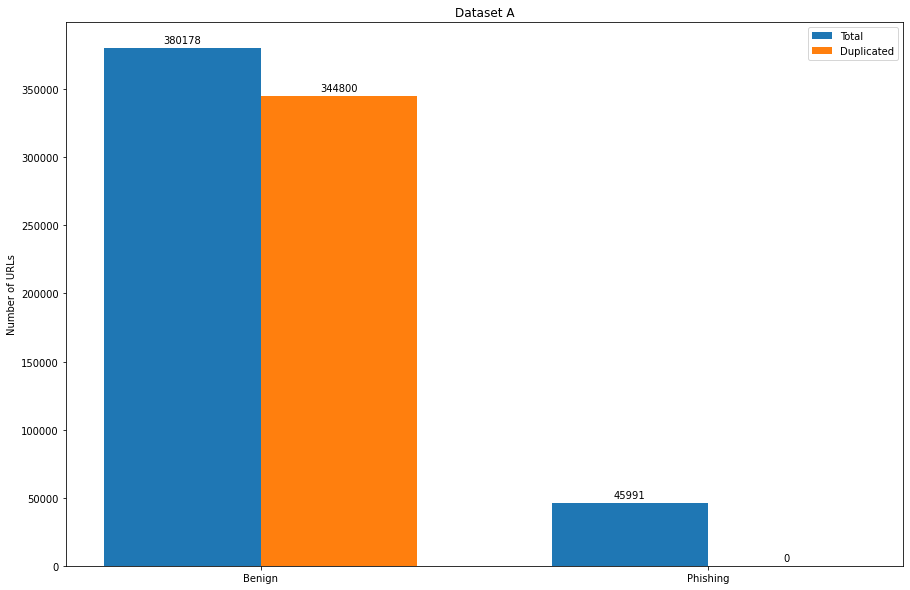

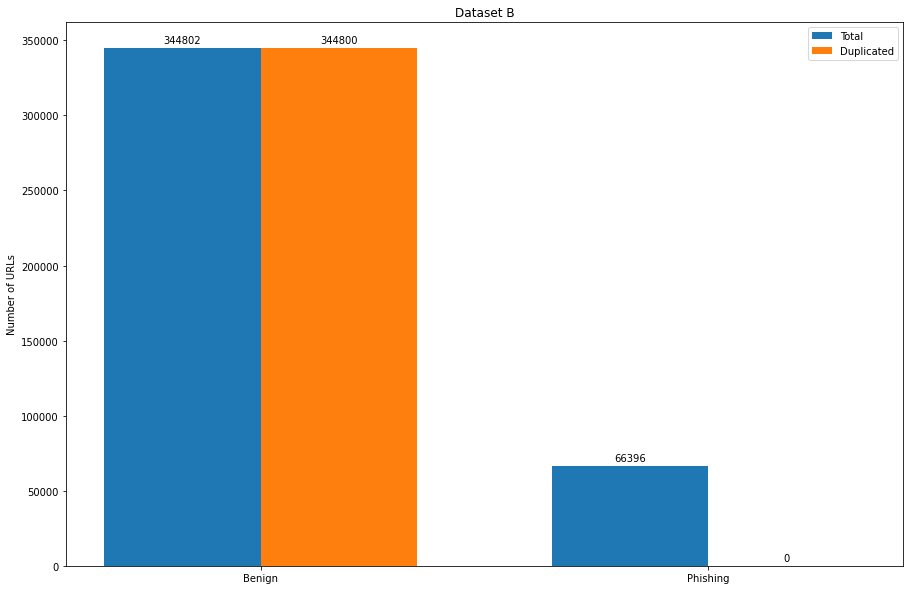

In [ ]:
# find common urls between dataset A and dataset B
unique_urls_dfA = set(dfA_legitimate_phishing['url'])
unique_urls_dfB = set(dfB['URL'])
common_urls = list(unique_urls_dfA.intersection(unique_urls_dfB))
print(f"There are {len(common_urls)} duplicate URLs between dataset A and B")

# find number of common benign urls in dataset A
common_urls_phishing_dfA = dfA_legitimate_phishing[(dfA_legitimate_phishing['url'].isin(common_urls)) & (dfA_legitimate_phishing['type'] == 1)]
print(f"Of all the {len(dfA_legitimate_phishing[dfA_legitimate_phishing['type'] == 1])} phishing URLs in dataset A, {len(common_urls_phishing_dfA)} of them are part of the set of common URLs")

# find number of common benign urls in dataset B
common_urls_phishing_dfB = dfB[(dfB['URL'].isin(common_urls)) & (dfB['Label'] == 1)]
print(f"Of all the {len(dfB[dfB['Label'] == 1])} phishing URLs in dataset B, {len(common_urls_phishing_dfB)} of them are part of the set of common URLs")

# find number of common phishing urls in dataset A
common_urls_benign_dfA = dfA_legitimate_phishing[(dfA_legitimate_phishing['url'].isin(common_urls)) & (dfA_legitimate_phishing['type'] == 0)]
print(f"Of all the {len(dfA_legitimate_phishing[dfA_legitimate_phishing['type'] == 0])} benign URLs in dataset A, {len(common_urls_benign_dfA)} of them are part of the set of common URLs")

# find number of common phishing urls in dataset B
common_urls_benign_dfB = dfB[(dfB['URL'].isin(common_urls)) & (dfB['Label'] == 0)]
print(f"Of all the {len(dfB[dfB['Label'] == 0])} benign URLs in dataset B, {len(common_urls_benign_dfB)} of them are part of the set of common URLs")

# plot duplicates distribution in dataset A
plot_dfA_dups = plot_dup_gbc(x_labels=["Benign", "Phishing"], 
                             first_bar_values=[len(dfA_legitimate_phishing[dfA_legitimate_phishing['type'] == 0]), len(dfA_legitimate_phishing[dfA_legitimate_phishing['type'] == 1])], 
                             second_bar_values=[len(common_urls_benign_dfA), len(common_urls_phishing_dfA)],
                             plot_title="Dataset A"
                             )

# plot duplicates distribution in dataset B
plot_dfB_dups = plot_dup_gbc(x_labels=["Benign", "Phishing"], 
                             first_bar_values=[len(dfB[dfB['Label'] == 0]), len(dfB[dfB['Label'] == 1])], 
                             second_bar_values=[len(common_urls_benign_dfB), len(common_urls_phishing_dfB)],
                             plot_title="Dataset B"
                             )

From the graph, we can see that all but 2 of the benign URLs in dataset B overlaps with benign URLs in dataset A. None of the phishing URLs in dataset A and B overlap. 

Originally, these were the steps to combine the dataset: 

1.   Extract all 45,991 phishing from dataset A 
2.   Extract all 380,178 legitimate urls from dataset A

1.   Randomly sample 45,991 phishing urls from dataset B. 
2.   Since the ratio of bad : good urls in dataset B is 1 : 5.2, randomly sample 45,991 * 5.2 ~= 239,153 good urls from dataset B 

1.   Concatenate the 4 dataframes to from our combined dataset  

However, looking at the duplicate URLs between A and B, we decided to just combine the unique URLs from both datasets instead of sampling. It does not make sense to sample 239,153 benign urls from dataset B when all but 2 of its benign URLs overlaps with dataset A. 





In [ ]:
# Combine both datasets 
print(f"We should expect that the final combined dataframe contains {len(dfA_legitimate_phishing) + len(dfB) - len(common_urls)} URls ")
dfA_legitimate_phishing = dfA_legitimate_phishing.rename(columns={"url": "URL", "type": "Label"})


# Label where the URL is taken from (which dataset)
dfA_legitimate_phishing["Dataset"] = "A"
dfB["Dataset"] = "B"

combined_df = pd.concat([dfA_legitimate_phishing, dfB]).drop_duplicates(subset="URL")
print(f"The combined dataframe has {len(combined_df)} URLs")

# Check again that there are no duplicates
num_dups = len(combined_df["URL"]) - len(combined_df["URL"].drop_duplicates())
print(f"There are {num_dups} duplicates")

print(combined_df.groupby(["Dataset", "Label"]).count())

We should expect that the final combined dataframe contains 492567 URls 
The combined dataframe has 492567 URLs
There are 0 duplicates
                  URL
Dataset Label        
A       0      380178
        1       45991
B       0           2
        1       66396


The combined dataset has 492567 URLs. Dataset A contributes 380178 benign and 45991 phishing URLs while Dataset B contributes 2 benign and 66936 phishing URLs. Dataset A contributes much more because most of the URLs are duplicated and the duplicates are removed from Dataset B. 

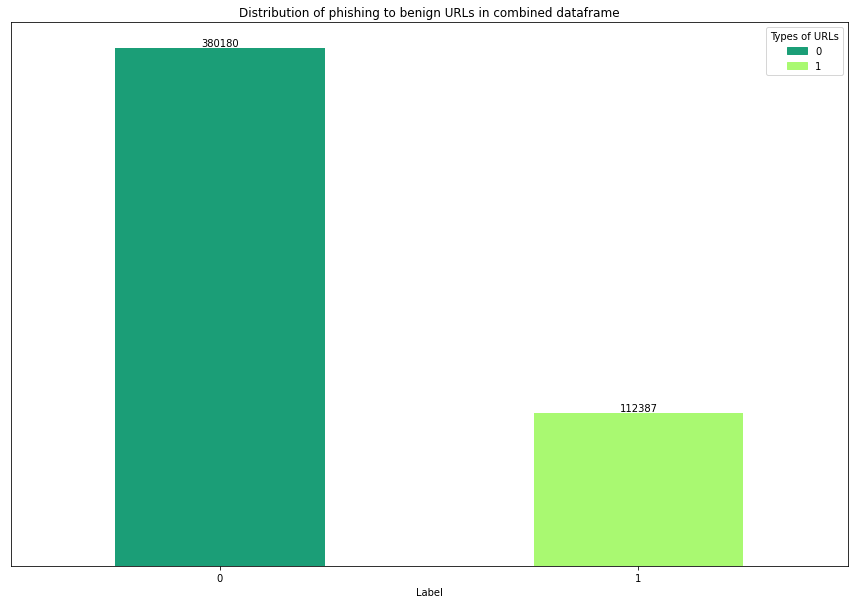

In [ ]:
# See distribution of phishing : benign in the combined df
colors = ['#1b9e77', '#a9f971']
plot_df = combined_df.groupby("Label").count()
plot_df = plot_df.reset_index()
graph = plot_df.plot.bar(x="Label", y="URL", rot=0, figsize=(15,10), color=colors, title="Distribution of phishing to benign URLs in combined dataframe")
graph.bar_label(graph.containers[0])
# map names to colors
cmap = dict(zip(c["count"], colors))

# create the rectangles for the legend
patches = [Patch(color=v, label=k) for k, v in cmap.items()]
plt.legend(title='Types of URLs', labels=('0','1'), handles = patches, loc='upper right',)
graph.axes.get_yaxis().set_visible(False)

## Train-Test-Split

In [ ]:
# duplicate the main df 
df = combined_df.copy(deep=True)
df['Label'].apply(str)
df.head()

,URL,Label,Dataset
0,br-icloud.com.br,1,A
1,mp3raid.com/music/krizz_kaliko.html,0,A
2,bopsecrets.org/rexroth/cr/1.htm,0,A
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,0,A
6,espn.go.com/nba/player/_/id/3457/brandon-rush,0,A


In [ ]:
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

In [ ]:
# split into X and Y data
Y_df = df.loc[:,['Label']]
X_df = df.loc[:,['URL']]

In [ ]:
# train test split with shuffling, test size=0.2, stratified 
train, test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

## Feature Extraction

The dataset only has two columns: url and type. Hence our team has formulated 22 heuristics from the urls using the main training data to better predict the fraud among the urls, and there are represented by the functions.

### Heuristic 1: Domain Length

In [ ]:
# helper function to extract domain name of the url in the form www.xxxx.xxx
def get_domain_name(url: string):
    parsed_uri = urlparse(url)
    if not parsed_uri.scheme: #does not have http
        idx = url.find("/")
        www = url.find("www")
        if www == -1: #url doesn't have www
            domain_name = f"www.{url[0:idx]}"
        else:
            domain_name = url[www:idx]
    else:
        domain_name = parsed_uri.netloc
        www = url.find("www")
        if www == -1:
            domain_name = f"www.{domain_name}"
    return domain_name

In [ ]:
# Length of domain name
def h1_domain_length(url: string):
    domain_name = get_domain_name(url)
    return len(domain_name)

### Heuristic 2: Number of slashes after http://

In [ ]:
# excludes counting the slashes in http://
# counts the number of '/' after http:// (if present) in the whole url 
def h2_num_slashes(url: string):
    parsed_uri = urlparse(url)
    if not parsed_uri.scheme:
        path = parsed_uri.path
        count_slashes = path.count('/')
    else:
        count_slashes = url.count('/') - 2
    return count_slashes

### Heuristic 3: Number of dots in the URL

In [ ]:
# counts the number of dots in the whole url
#maybe don't include dots in the query portion
def h3_num_dots_url(url:string):
    count_dots = url.count('.')
    return count_dots

### Heuristic 4: Number of terms in domain name

In [ ]:
# counts the number of terms in the domain name 
def h4_count_terms_hostname(url: string):
    domain_name = get_domain_name(url)
    terms = domain_name.split('.')
    return len(terms)

### Heuristic 5: Number of special characters

In [ ]:
# counts the number of non-digit or alphabet characters in the whole url 
def h5_num_special_characters(url: string):
    #domain_name = get_domain_name(url)
    special_char= 0
   
    for i in range(0, len(url)):  
    # len(string) function to count the 
    # number of characters in given string.
      
        ch = url[i]

        if (url[i].isalpha()):   #.isalpha() function checks whether character is alphabet or not.
            continue       
       
        elif (url[i].isdigit()):  #.isdigit() function checks whether character is a number or not.
            continue       
                    
        elif (url[i] == "/" or url[i] == "."): # exclude count of / and . to minimise overlap with heuristic 2 and heuristic 3
            continue
            
        else: 
            special_char += 1
    return special_char

### Heuristic 6: IP Address

In [ ]:
# check whether it has an IP address
def is_valid_ipv4_address(address):
    try:
        socket.inet_pton(socket.AF_INET, address)
    except AttributeError:  # no inet_pton here, sorry
        try:
            socket.inet_aton(address)
        except socket.error:
            return False
        return address.count('.') == 3
    except socket.error:  # not a valid address
        return False

    return True

def is_valid_ipv6_address(address):
    try:
        socket.inet_pton(socket.AF_INET6, address)
    except socket.error:  # not a valid address
        return False
    return True

def h6_has_ip(url):
    szukane = r'(?:\d{1,3}\.)+(?:\d{1,3})'
    looks_like_ip = re.findall(szukane, url)
    if len(looks_like_ip) != 0:
        for lookalike in looks_like_ip:
            if is_valid_ipv6_address(lookalike) or is_valid_ipv4_address(lookalike):
                return 1
        return 0
    else:
        return 0

### Heuristic 7: Number of unicode in URL

In [ ]:
# count the number of unicode in the whole url
def h7_num_unicode(url):
    unicode = 0
    for i in range(0, len(url)):  
        if ord(url[i]) >= 128:
            unicode += 1
    return unicode

### Heuristic 8: Transport layer security
The heuristic comprises of 3 columns: http, https, and no_http <br>
If string has no 'http', return 1 for no_http. Else return 0. <br>
If url has 'http' inside URL, but not 'https', return 1 for http. Else return 0. <br>
If string has 'https', return 1 for https. Else return 0.

In [ ]:
# check for http and https in the url
def h8_no_http(url):
    # http protocol always at start of url 
    # filtering first 10 to ensure 'http' recorded in later part of url is ignored
    if('http' not in url[:10]): 
        return 1
    else:
        return 0
    
def h8_http(url):
    # http protocol always at start of url 
    # filtering first 10 to ensure 'http' recorded in later part of url is ignored
    if('http' in url[:10]):
        if url.find('https') == -1: # https not present
            return 1
        else:
            return 0 # https present
    else:
        return 0
    
def h8_https(url):
    # http protocol always at start of url 
    # filtering first 10 to ensure 'http' recorded in later part of url is ignored
    if('https' in url[:10]): 
        return 1
    else:
        return 0

### Heuristic 9: Subdomain in URL

In [ ]:
# check for subdomain in the url
def h9_subdomain(url):
    if(len(tldextract.extract(url).subdomain)) == 0:
        return 0
    return 1

### Heuristic 10: Special Keywords

In [ ]:
# count the number of occurences of the keywords
def h10_num_special_keywords(url):
    return url.count(".net") + url.count("client") + url.count("admin") + url.count("server") 
    + url.count("login") + url.count("update") + url.count("security")      

### Heuristic 11: Top Level Domain in URL

In [ ]:
# check if url has top level domain
def h11_top_level_domain(url):
    ext = tldextract.extract(url)
    top_level_domain = ext.suffix
    registered_domain =  ext.registered_domain
    if top_level_domain != "":
        return 1
    return 0

### Heuristic 12: Number of Dots in Path of URL

In [ ]:
# count the number of dots in the path in the url
def h12_num_dots_path(url):
    try:
        parsed_url = urlparse(url) 
        if not parsed_url.scheme and not parsed_url.netloc:
          parsed_url = "//www." + parsed_url.path
          path = urlparse(parsed_url).path
        else:
          path = parsed_url.path
        #print(path)

        return path.count('.')
    except:
        return None

### Heuristic 13: Number of Hyphens in Hostname

In [ ]:
# Heuristic 13: - Number of hyphens in hostname
def h13_num_hyphens_hostname(url):
    ext = tldextract.extract(url)
    return '.'.join(ext[:3]).count('-')

### Heuristic 14: URL Length

In [ ]:
# count the length of the url
def h14_url_length(url):
    return len(url)

### Heuristic 15: Number of Capitalisation in URL

In [ ]:
def h15_num_capitalizations(url):
    uppercases = [i for i in url if i.isupper()]
    return len(uppercases)

### Heuristic 16: Number of Digits in URL

In [ ]:
def h16_num_digits(url):
    digits = [i for i in url if i.isdigit()]
    return len(digits)

### Heuristic 17: Shannon Entropy

In [ ]:
# count the entropy of the url
def h17_entropy(text):
        text = text.lower()
        probs = [text.count(c) / len(text) for c in set(text)]
        entropy = -sum([p * log(p) / log(2.0) for p in probs])
        return entropy

### Heuristic 18: Path Length

In [ ]:
# count length of path of the url
def h18_path_length(url):
    parsed_url = urlparse(url) 
    path_length = 0
    # if doesn't have www. and http., parsed_url = url 
    if not parsed_url.scheme and not parsed_url.netloc:
        # add www. to url so that path can be extracted
        parsed_url = "//www." + parsed_url.path
        try:
            path = urlparse(parsed_url).path
            path_length = len(path)
        except:
            path_length = None
    else:
        path = parsed_url.path
        path_length = len(path)
    return path_length

### Heuristic 19: Number of Parameters

In [ ]:
# count the number of parameters
def h19_num_query_parameters(url):
        params = urlparse(url).query
        return 0 if params == '' else len(params.split('&'))

### Heuristic 20: Port in URL

In [ ]:
# check whether the url has a port 
def h20_has_port(url):
        has_port = urlparse(url).netloc.split(':')
        if len(has_port) > 1 and has_port[-1].isdigit():
            return 1
        else:
            return 0

### Heuristic 21: Number of Fragments

In [ ]:
# count the number of fragments
def h21_num_fragments(url):
    fragments = url.split('#')
    return len(fragments) - 1

### Heuristic 22: Contains Influential Company Names in URL

In [ ]:
# check if the url contains any of the influential company names in the list

companies_influential_30 = ['apple','amazon','microsoft','netflix','usaa','paypal','delta','visa','adobe','bankofamerica',
                        'google','bestbuy','capitalone','autodesk','adp','asus','apache','americanelectricpower','alibaba',
                            'amd','activision','samsung','schwab','merck','ups','3m','target','caci','adm']

def h22_influential_company(url:string):
    url_lowercase = url.lower()
    for company in companies_influential_30:
        if company in url_lowercase:
            return 1
    return 0

### Call all functions on training data

In [ ]:
# helper function to call all functions 
def extract_features(df):
    
    df.loc[:,"domain_length"] = df.apply(lambda x: h1_domain_length(x["URL"]), axis=1)
    df.loc[:,"num_slashes"] = df.apply(lambda x: h2_num_slashes(x["URL"]), axis=1)
    df.loc[:,"num_dots_url"] = df.apply(lambda x: h3_num_dots_url(x["URL"]), axis=1)
    df.loc[:,"num_terms"] = df.apply(lambda x: h4_count_terms_hostname(x["URL"]), axis=1)
    df.loc[:,"num_special_characters"] = df.apply(lambda x: h5_num_special_characters(x["URL"]), axis=1)
    df.loc[:,"has_ip"] = df.apply(lambda x: h6_has_ip(x["URL"]), axis=1)
    df.loc[:,"num_unicode"] = df.apply(lambda x: h7_num_unicode(x["URL"]), axis=1)
    df.loc[:,"no_http"] = df.apply(lambda x: h8_no_http(x["URL"]), axis=1) #one feature (h8)
    df.loc[:,"http"] = df.apply(lambda x: h8_http(x["URL"]), axis=1) #one feature (h8)
    df.loc[:,"https"] = df.apply(lambda x: h8_https(x["URL"]), axis=1) #one feature (h8)
    df.loc[:,"subdomain"] = df.apply(lambda x: h9_subdomain(x["URL"]), axis=1)
    df.loc[:,"num_special_keywords"] = df.apply(lambda x: h10_num_special_keywords(x["URL"]), axis=1)
    df.loc[:,"top_level_domain"] = df.apply(lambda x: h11_top_level_domain(x["URL"]), axis=1)
    df.loc[:,"num_dots_path"] = df.apply(lambda x: h12_num_dots_path(x["URL"]), axis=1)
    df.loc[:,"num_hypens_hostname"] = df.apply(lambda x: h13_num_hyphens_hostname(x["URL"]), axis=1)
    df.loc[:,"url_length"] = df.apply(lambda x: h14_url_length(x["URL"]), axis=1)
    df.loc[:,"num_capitalisations"] = df.apply(lambda x: h15_num_capitalizations(x["URL"]), axis=1)
    df.loc[:,"num_digits"] = df.apply(lambda x: h16_num_digits(x["URL"]), axis=1)
    df.loc[:,"entropy"] = df.apply(lambda x: h17_entropy(x["URL"]), axis=1)
    df.loc[:,"path_length"] = df.apply(lambda x: h18_path_length(x["URL"]), axis=1)
    df.loc[:,"num_query_parameters"] = df.apply(lambda x: h19_num_query_parameters(x["URL"]), axis=1)
    df.loc[:,"has_port"] = df.apply(lambda x: h20_has_port(x["URL"]), axis=1)
    df.loc[:,"num_fragments"] = df.apply(lambda x: h21_num_fragments(x["URL"]), axis=1)
    df.loc[:,"influential_company"] = df.apply(lambda x: h22_influential_company(x["URL"]), axis=1)
    
    return df

### Create train and test datasets with heuristics

```
# This is formatted as code
```



In [ ]:
feature_train = train.copy(deep=True)
feature_train = extract_features(feature_train)

feature_test = test.copy(deep=True)
feature_test = extract_features(feature_test)

## EDA

### Numerical Variables

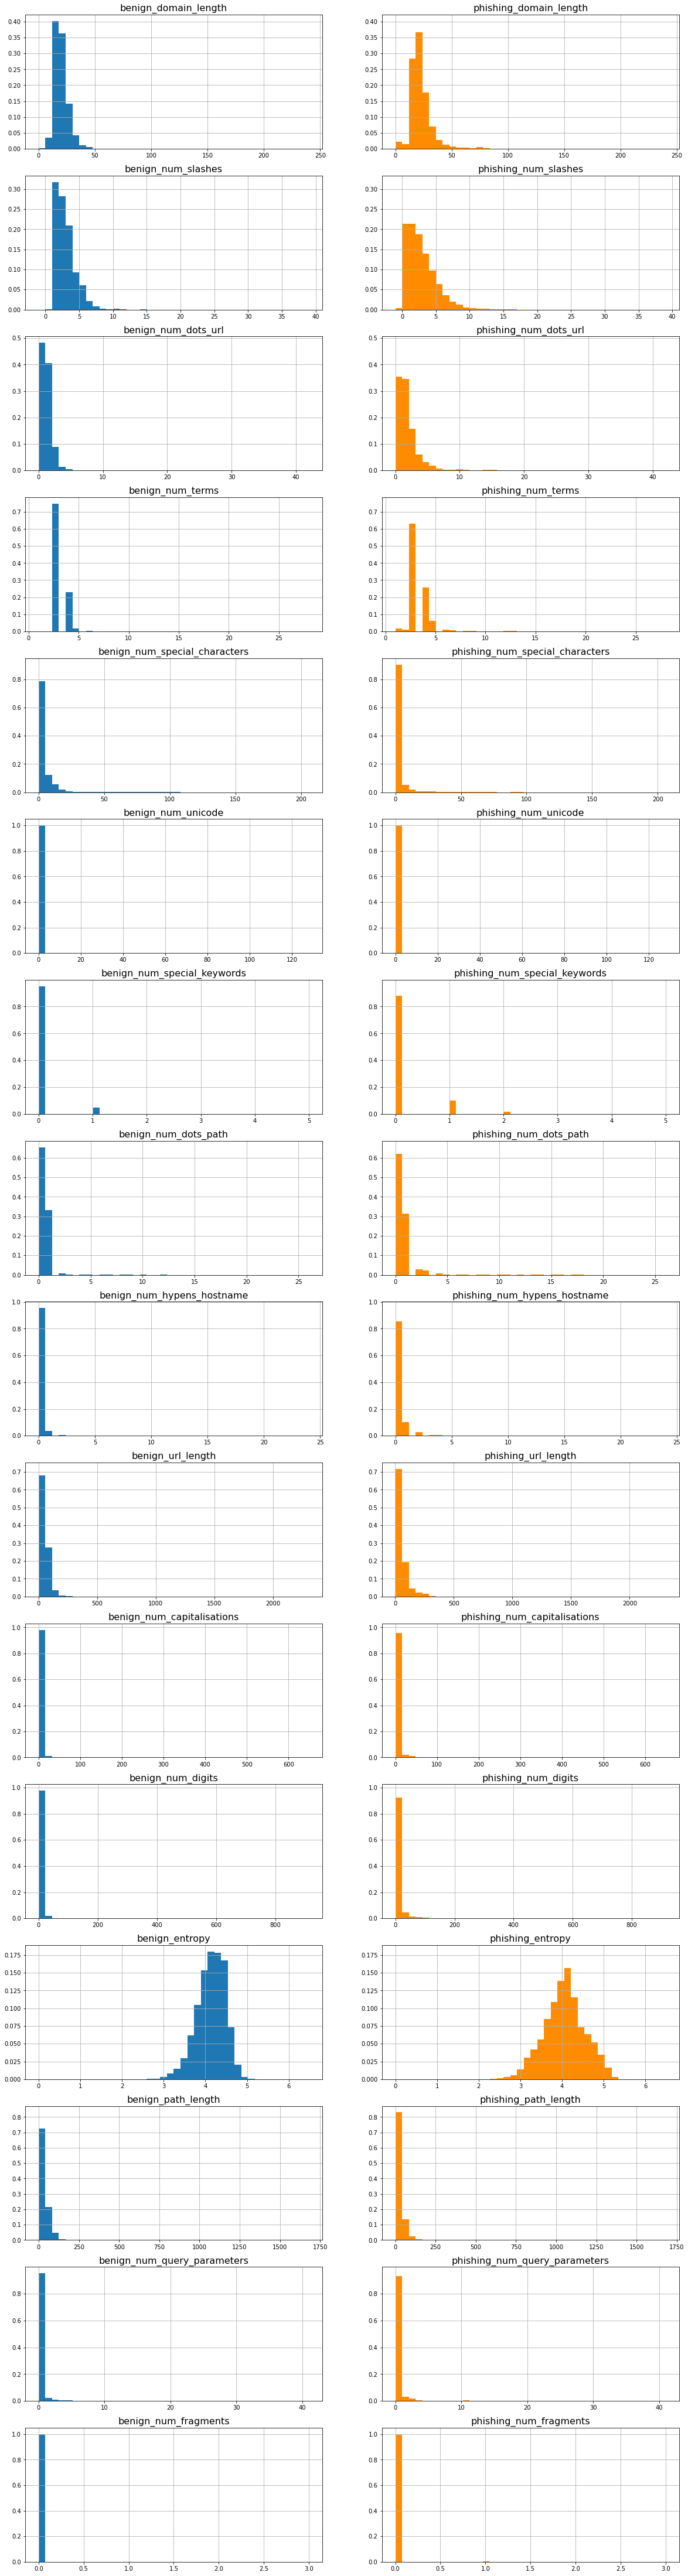

In [ ]:
combined_feature_train_EDA = feature_train.copy(deep=True).reset_index()
feature_train_benign = combined_feature_train_EDA[combined_feature_train_EDA['Label'] == 0]
feature_train_phishing = combined_feature_train_EDA[combined_feature_train_EDA['Label'] == 1]
# Numerical variables histogram

plt.figure(figsize=(20,80))
plt.subplot(321)

numerical_columns = ['domain_length', 'num_slashes', 'num_dots_url', 'num_terms', 'num_special_characters', 'num_unicode','num_special_keywords','num_dots_path','num_hypens_hostname','url_length','num_capitalisations','num_digits','entropy','path_length','num_query_parameters','num_fragments']
axes = [None] * (len(numerical_columns) * 2)
index = 0
combined_feature_train = feature_train_benign.append(feature_train_phishing, ignore_index=True)

for name in numerical_columns:   
    axes[index] = plt.subplot(16, 2, index+1, label=str(index))
    feature_train_benign[name].hist(ax=axes[index], bins=40, range = (combined_feature_train_EDA[name].min(),combined_feature_train_EDA[name].max()), weights=np.ones(len(feature_train_benign)) / len(feature_train_benign))
    axes[index].set_title('benign_' + name, fontsize=16)
    index += 1
    
    axes[index] = plt.subplot(16, 2, index+1, label=str(index))
    feature_train_phishing[name].hist(ax=axes[index], bins=40, color = 'darkorange', range = (combined_feature_train_EDA[name].min(),combined_feature_train_EDA[name].max()), weights=np.ones(len(feature_train_phishing)) / len(feature_train_phishing))
    axes[index].set_title('phishing_' + name, fontsize=16)
    axes[index - 1].sharey(axes[index])
    axes[index - 1].sharex(axes[index])

    
    index += 1
     

### Categorical

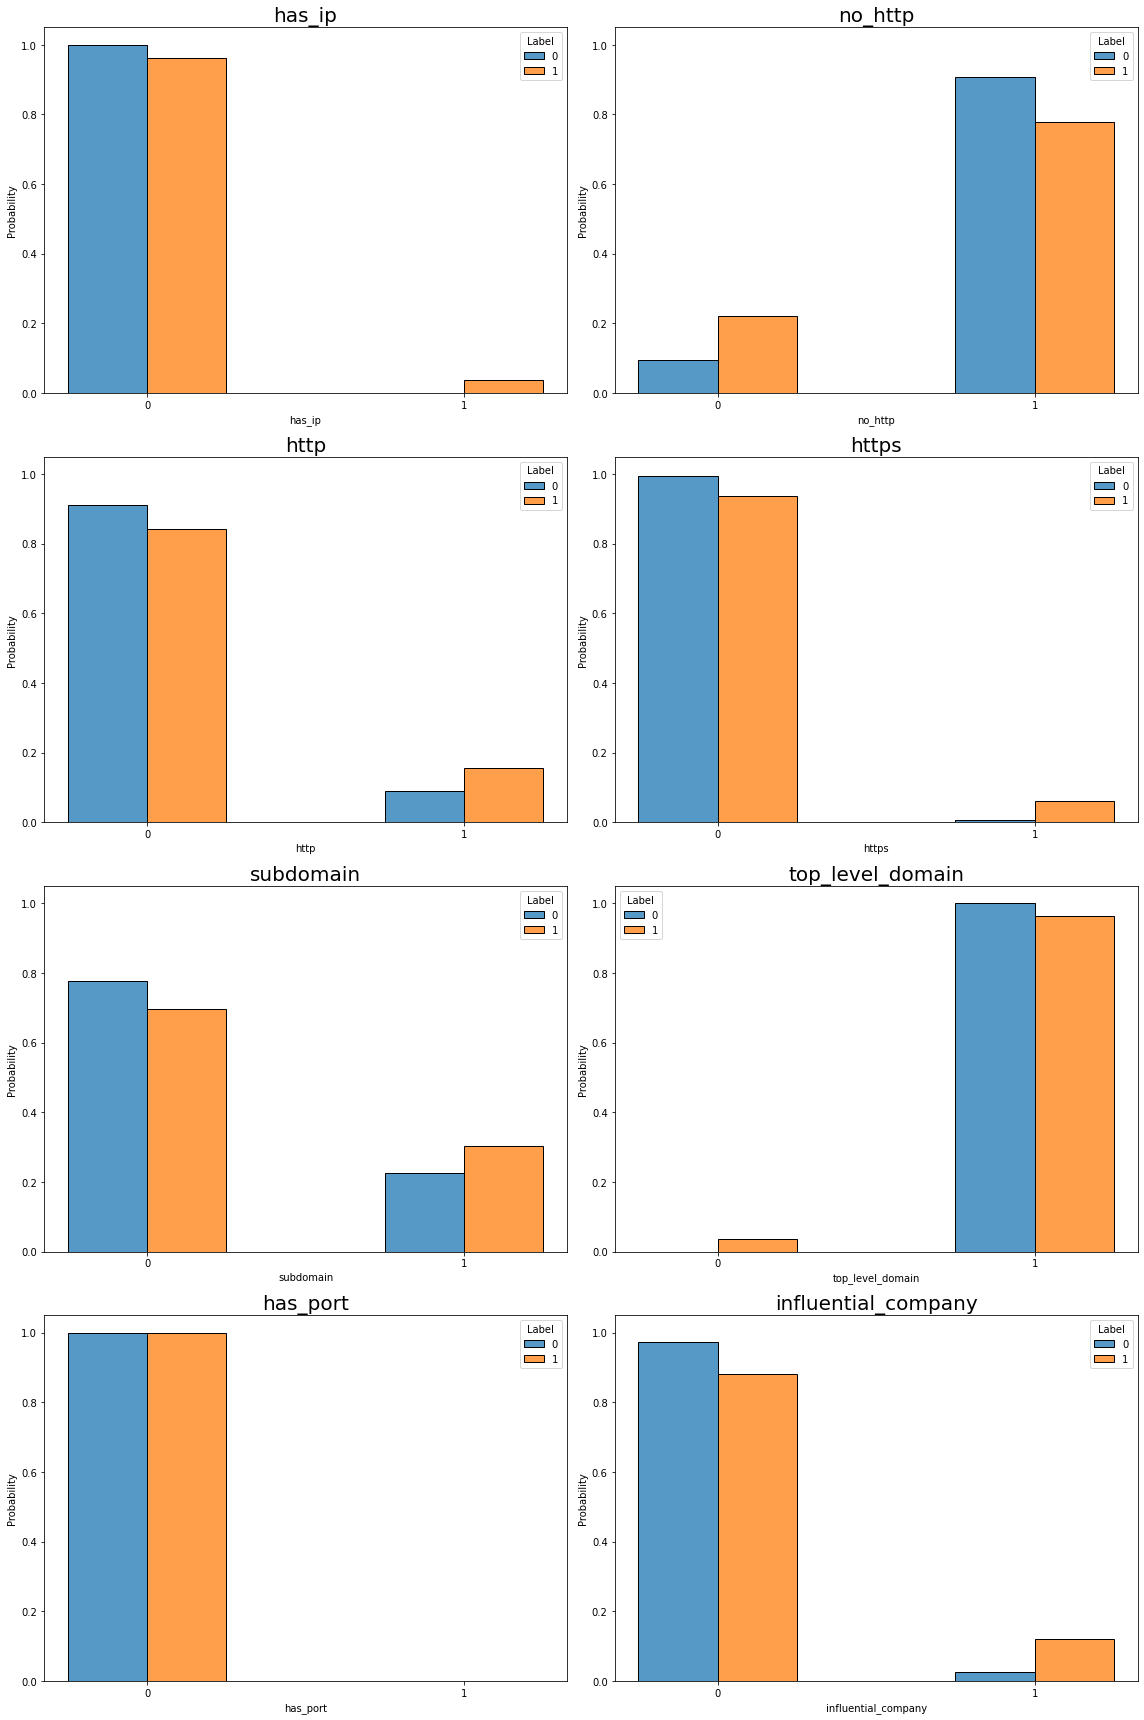

In [ ]:
f, axes = plt.subplots(4, 2, figsize=(16, 24), sharex=False)

cat_variables = ['has_ip','no_http','http','https','subdomain','top_level_domain','has_port','influential_company']




for index, name in enumerate(cat_variables):
    combined_feature_train_EDA[name] = combined_feature_train_EDA[name].map(str)
    combined_feature_train_EDA[name] = pd.Categorical(combined_feature_train_EDA[name], ['0','1'])
    sns.histplot(x=name, data=combined_feature_train_EDA, ax=axes[index//2,index%2], hue = 'Label', multiple="dodge", 
                  stat = 'probability', common_norm=False, discrete = True, shrink = 0.5)
    axes[index//2,index%2].set_title(name, fontsize=20)

    
    axes[index//2,index%2].sharey(axes[0,0])
    
                                           

plt.tight_layout()

### Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler
numerical_columns = ['domain_length', 'num_slashes', 'num_dots_url', 'num_terms', 'num_special_characters', 'num_unicode','num_special_keywords','num_dots_path','num_hypens_hostname','url_length','num_capitalisations','num_digits','entropy','path_length','num_query_parameters','num_fragments']

for name in numerical_columns:
    sc = StandardScaler()
    feature_train[name] = sc.fit_transform(np.array(feature_train[name]).reshape(-1, 1)).flatten()
    feature_test[name] = sc.transform(np.array(feature_test[name]).reshape(-1, 1)).flatten()

### Numerical (After Normalization)

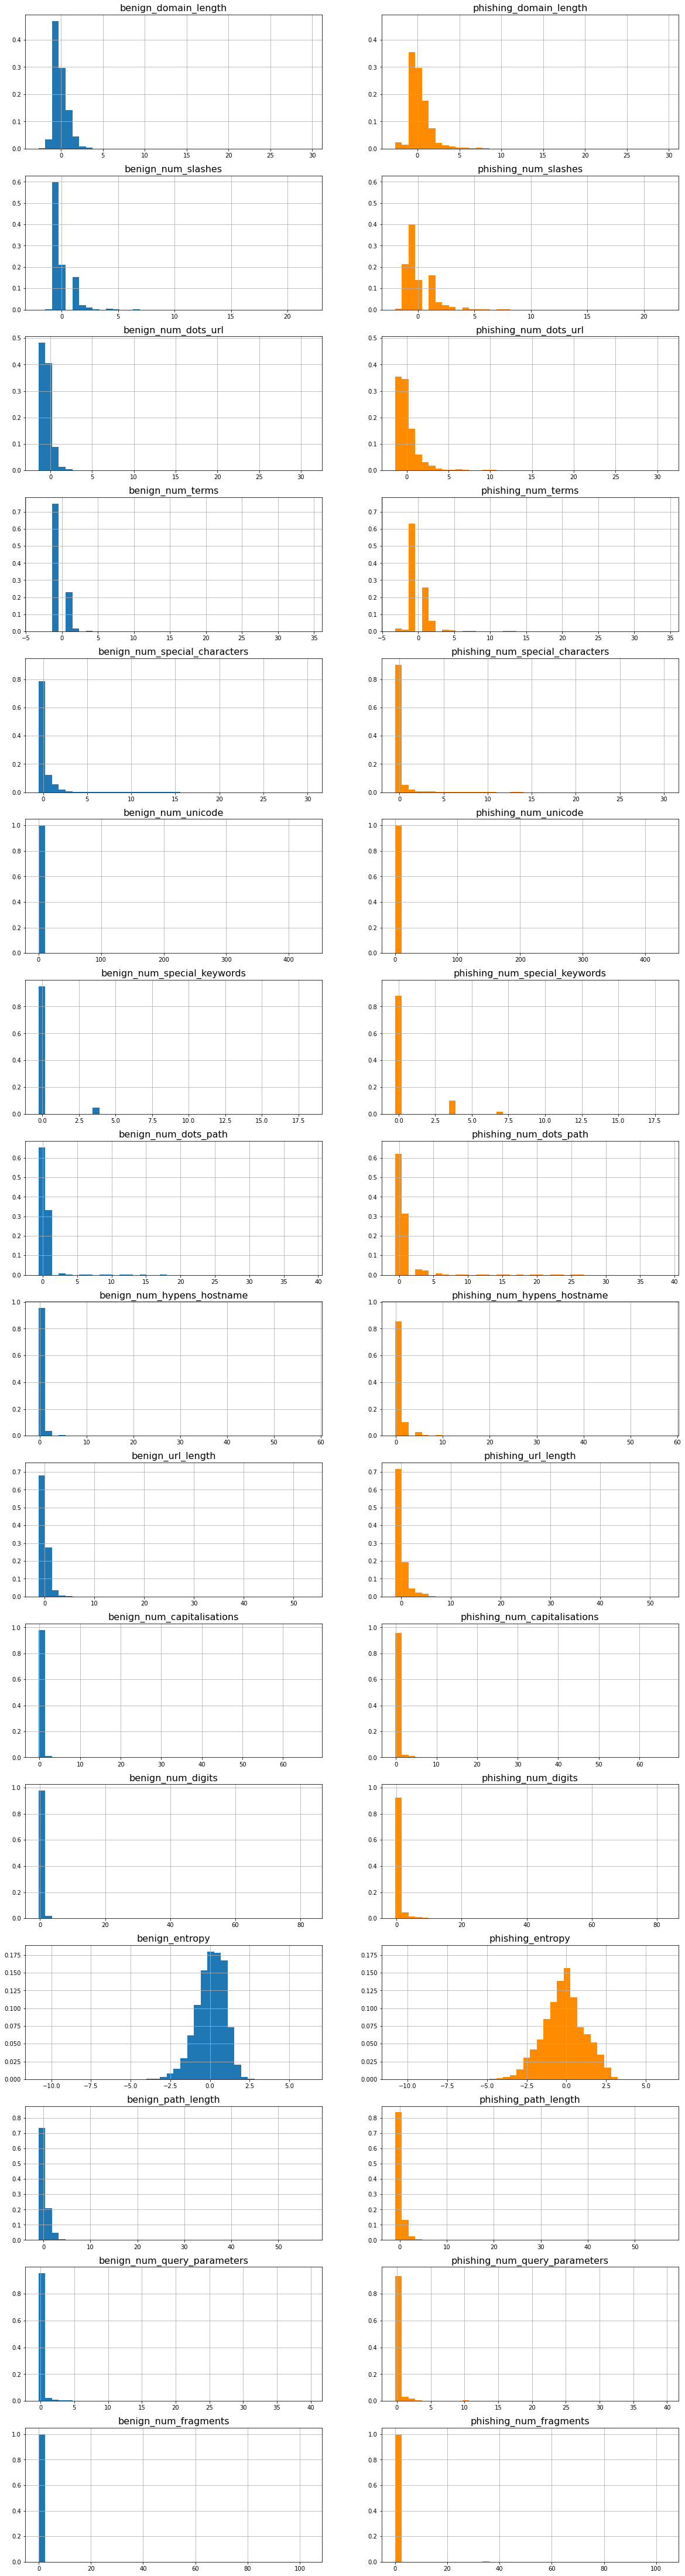

In [ ]:
# Numerical variables histogram
combined_feature_train_EDA = feature_train.copy(deep=True).reset_index()
feature_train_benign = combined_feature_train_EDA[combined_feature_train_EDA['Label'] == 0]
feature_train_phishing = combined_feature_train_EDA[combined_feature_train_EDA['Label'] == 1]

plt.figure(figsize=(20,80))
plt.subplot(321)

numerical_columns = ['domain_length', 'num_slashes', 'num_dots_url', 'num_terms', 'num_special_characters', 'num_unicode','num_special_keywords','num_dots_path','num_hypens_hostname','url_length','num_capitalisations','num_digits','entropy','path_length','num_query_parameters','num_fragments']
axes = [None] * (len(numerical_columns) * 2)
index = 0
combined_feature_train = feature_train_benign.append(feature_train_phishing, ignore_index=True)

for name in numerical_columns:   
    axes[index] = plt.subplot(16, 2, index+1, label=str(index))
    feature_train_benign[name].hist(ax=axes[index], bins=40, range = (combined_feature_train_EDA[name].min(),combined_feature_train_EDA[name].max()), weights=np.ones(len(feature_train_benign)) / len(feature_train_benign))
    axes[index].set_title('benign_' + name, fontsize=16)
    index += 1
    
    axes[index] = plt.subplot(16, 2, index+1, label=str(index))
    feature_train_phishing[name].hist(ax=axes[index], bins=40, color = 'darkorange', range = (combined_feature_train_EDA[name].min(),combined_feature_train_EDA[name].max()), weights=np.ones(len(feature_train_phishing)) / len(feature_train_phishing))
    axes[index].set_title('phishing_' + name, fontsize=16)
    axes[index - 1].sharey(axes[index])
    axes[index - 1].sharex(axes[index])

    
    index += 1
     

Check and remove rows with invalid values in feature_train and feature_test

In [ ]:
print("Do any columns have na values?:")
print(feature_train.isnull().any())
print(feature_test.isnull().any())

Do any columns have na values?:
URL                       False
Label                     False
Dataset                   False
domain_length             False
num_slashes               False
num_dots_url              False
num_terms                 False
num_special_characters    False
has_ip                    False
num_unicode               False
no_http                   False
http                      False
https                     False
subdomain                 False
num_special_keywords      False
top_level_domain          False
num_dots_path             False
num_hypens_hostname       False
url_length                False
num_capitalisations       False
num_digits                False
entropy                   False
path_length               False
num_query_parameters      False
has_port                  False
num_fragments             False
influential_company       False
dtype: bool
URL                       False
Label                     False
Dataset                   Fa

## Multicollinearity Test on feature_train

<AxesSubplot:>

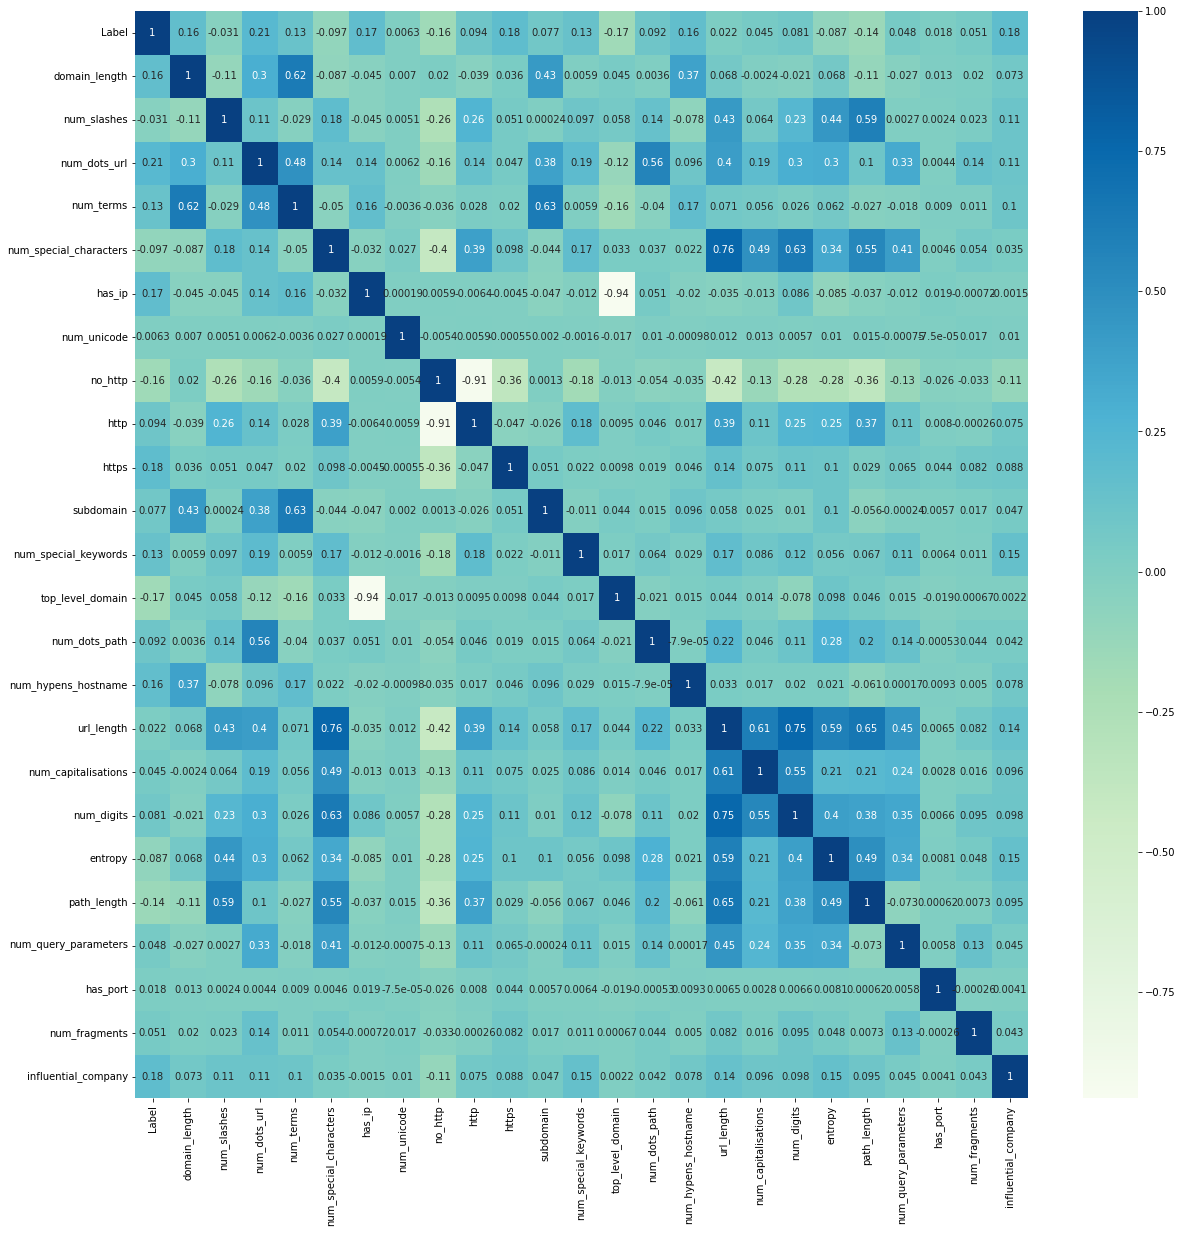

In [ ]:
# multicollinearity heatmap
plt.figure(figsize=(20,20))
correlation = feature_train.corr()
sns.heatmap(correlation, cmap = "GnBu", annot=True)

From the correlation matrix, we identify a few pairs of variables that have moderate-to-high correlation (>0.7).

    1. number of special characters vs url length (0.76)
    2. has ip address in url vs has top level domain (-0.94)
    3. url length vs number of digits (0.75)
    4. http vs no http (-0.91)

URL length is correlated with 2 other features:
    
    1. Number of special characters (0.76)
    2. Number of digits (0.75)

This is expected since a longer URL length would mean a higher chance of there being more special characters, digits, compared to a URL of shorter length. Since URL length can be considered as a more 'general' feature than number of special characters, digits, we will drop URL length. Also, the remaining features can help to determine more specific characteristics of phishing and benign URLs. For example, the model would be more useful if we were able to conclude that phishing URLs have more special characters, and digits compared to just phishing URLs are longer. More specific characteristics can be determined by keeping the specific features. 

<!-- Domain length is correlated with number of terms in domain (0.78)
  
This is also expected since a higher number of terms and more subdomains would mean a longer domain length. We will opt to remove domain length following the same reasoning as above.  -->

The presence of IP address in the URL is almost perfectly negatively correlated with the presence of a top level domain (-0.93). We will leave these two features and remove one based on which explains more variability in the data, in the next step. 

Lastly, presence of HTTP as the transport security layer is almost perfectly negatively correlated with the absence of a transport security layer term (no http or https). Similarly to above, we will leave the two features to be removed in the next step.





## Drop unwanted features and split into X, Y train and test

In [ ]:
corr_features_to_drop = ["url_length"] #still need to use mutual info classifier to determine which other corr features to drop

feature_train = feature_train.drop(columns=["URL", "Dataset"]) # removing columns that are not heuristics
feature_train = feature_train.drop(columns=corr_features_to_drop) # removing correlated feature

feature_test = feature_test.drop(columns=["URL", "Dataset"])
feature_test = feature_test.drop(columns=corr_features_to_drop)

In [ ]:
X_train = feature_train.loc[:, feature_train.columns != 'Label']
y_train = feature_train['Label']

X_test = feature_test.loc[:, feature_test.columns != 'Label']
y_test = feature_test['Label']

Now, we have 21 heuristics (22 minus url_length because of correlation) and 23 columns because heuristic 8 has 3 columns (one hot encoded)

### SelectKBest

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=random_seed)

In [ ]:

load=False
if(load == False):#put load = False to use the pickle file
  try:
    lr_clf = load_file("lr_select_k_best.pkl")
    print(lr_clf.best_estimator_)
  except Exception as e:
    print(e)

else:
  # set up pipeline for logistic regression
  lr_pipe = Pipeline([('scaler', StandardScaler()),
                  ('selector', SelectKBest(mutual_info_classif)),
                  ('classifier', LogisticRegression())])

  # set up search space
  lr_search_space = [{'selector__k': [14, 16, 18]},
                  {'classifier': [LogisticRegression()]}]

  # run SelectKBest


  lr_clf = GridSearchCV(lr_pipe, lr_search_space, cv=cv, verbose=0)
  lr_clf = lr_clf.fit(X_train, y_train)


  lr_clf.best_estimator_
  print(lr_clf.best_estimator_)

  save_file("lr_select_k_best.pkl", lr_clf)


Pipeline(steps=[('scaler', StandardScaler()),
                ('selector',
                 SelectKBest(k=18,
                             score_func=<function mutual_info_classif at 0x7f85f6a5af80>)),
                ('classifier', LogisticRegression())])


In [ ]:
# set up pipeline for xgboost
import xgboost as xgb

load = False #put load = False to use the pickle file
if(load == False):
  try:
    xg_clf = load_file("xgb_select_k_best.pkl")
    print(xg_clf.best_estimator_)
  except Exception as e:
    print(e)
else:
  xg_pipe = Pipeline([('scaler', StandardScaler()),
                ('selector', SelectKBest(mutual_info_classif)),
                ('classifier', xgb.XGBClassifier())])

  # set up search space
  xg_search_space = [{'selector__k': [14, 16, 18]},
                  {'classifier': [xgb.XGBClassifier()]}]

  # run SelectKBest


  xg_clf = GridSearchCV(xg_pipe, xg_search_space, cv=cv, verbose=0)
  xg_clf = xg_clf.fit(X_train, y_train)


  xg_clf.best_estimator_
  print(xg_clf.best_estimator_)
  save_file("xgb_select_k_best.pkl", xg_clf)


Pipeline(steps=[('scaler', StandardScaler()),
                ('selector',
                 SelectKBest(k=18,
                             score_func=<function mutual_info_classif at 0x7f85f6a5af80>)),
                ('classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exa

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator StandardScaler from version 1.1.3 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator SelectKBest from version 1.1.3 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator Pipeline from version 1.1.3 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For mo

By here, we have concluded from the gridsearch that k=18 is optimal for selectKbest

In [ ]:
# Create and fit selector with pipeline
selector = SelectKBest(score_func=mutual_info_classif, k=18)
selector.fit(X_train, y_train)

SelectKBest(k=18, score_func=<function mutual_info_classif at 0x7f838fc00f80>)

From the correlation matrix above, we need to decide between has_ip and top_level_domain and between http and no_http.
From the mutual info classifier values, we decide to keep top_level domain and no_http because they have the higher values.


In [ ]:
# display feature names and their scores from SelectKBest
feat_scores = pd.DataFrame()
feat_scores["mutual_info_classif"] = selector.scores_
feat_scores["Support"] = selector.get_support()
feat_scores["Attribute"] = X_train.columns
feat_scores
feat_scores.sort_values(by=['mutual_info_classif'], ascending=False).reset_index(drop=True)

,mutual_info_classif,Support,Attribute
0,0.106315,True,path_length
1,0.093018,True,num_slashes
2,0.075778,True,top_level_domain
3,0.061980,True,no_http
4,0.049652,True,entropy
5,0.039828,True,num_dots_url
6,0.034329,True,num_digits
7,0.033335,True,num_terms
8,0.031359,True,num_dots_path
9,0.030824,True,num_special_characters


In [ ]:
selected_columns = feat_scores[(feat_scores["Support"] == True) & ~(feat_scores["Attribute"].isin(["has_ip"]))]
X_train = X_train[selected_columns["Attribute"]]
X_test = X_test[selected_columns["Attribute"]]

Now, we have 16 heuristics and 17 columns. Because there are two columns belonging to heuristic 8. 

### Splitting the train-test into 3 further datasets of differing proportion
On top of conducting our project over the original training and testing dataset, we would like to investigate whether the different ratios of phishing and benign URLs in the dataset would lead to a large change in performance by the models.

In [ ]:
# Current train data ratio split 
good = feature_train[feature_train['Label'] == 0]
bad = feature_train[feature_train['Label'] == 1]

print(f"The current number of phishing URLs in this training dataset = {len(bad.index)}")
print(f"The current number of Legitimate URLs in this training dataset = {len(good.index)}")
print(f"The percentage of phishing URLs in this training dataset = {len(bad.index)/len(train.index) *100}%")

The current number of phishing URLs in this training dataset = 89923
The current number of Legitimate URLs in this training dataset = 304130
The percentage of phishing URLs in this training dataset = 22.820026747670997%


With the percentage of phishing URLs in this training dataset = 22.820%, In order to ensure that the size of dataset across the 3 ratios are the same, to maximise the size of the dataset so that we have more training data, we note that the maximum size of the 3 ratios of the dataset would be 89923/0.75 = 119897 (to nearest integer).

**10% phishing, 90% benign split** 

In [ ]:
# 10% of dataset value rounded off

# sample num_bad df to ensure count is equal to 10% of training data
phising_num = int(round(119897/10, 0))
non_phising_num = int(round(119897/10*9, 0))
training_ratio_10perc_phish = bad.sample(n=phising_num, random_state=42)
training_ratio_10perc_non_phish = good.sample(n=non_phising_num, random_state=42)
# combine training_ratio_10perc_phish and training_ratio_10perc_non_phish
combined_train_10perc_phish = pd.concat([training_ratio_10perc_phish, training_ratio_10perc_non_phish])

ratio = len(combined_train_10perc_phish[combined_train_10perc_phish['Label'] == 1].index)/ len(combined_train_10perc_phish.index) 
print(f"Ratio of phishing in overall training dataset = {ratio}")

Ratio of phishing in overall training dataset = 0.10000250214767675


In [ ]:
X_train_10perc_phish = combined_train_10perc_phish.loc[:, combined_train_10perc_phish.columns != 'Label']
y_train_10perc_phish = combined_train_10perc_phish['Label']
X_train_10perc_phish = X_train_10perc_phish[selected_columns["Attribute"]]

**50% phishing, 50% benign split**


In [ ]:
# 50% of dataset value rounded off

# sample num_bad df to ensure count is equal to 10% of training data
phising_num = int(round(119897/2, 0))
non_phising_num = int(round(119897/2, 0))
training_ratio_50perc_phish = bad.sample(n=phising_num+1, random_state=42)
training_ratio_50perc_non_phish = good.sample(n=non_phising_num, random_state=42)
# combine training_ratio_50perc_phish and training_ratio_50perc_non_phish
combined_train_50perc_phish = pd.concat([training_ratio_50perc_phish, training_ratio_50perc_non_phish])

ratio = len(combined_train_50perc_phish[combined_train_50perc_phish['Label'] == 1].index)/ len(combined_train_50perc_phish.index) 
print(f"Ratio of phishing in overall training dataset = {ratio}")

Ratio of phishing in overall training dataset = 0.500004170246128


In [ ]:
X_train_50perc_phish = combined_train_50perc_phish.loc[:, combined_train_50perc_phish.columns != 'Label']
y_train_50perc_phish = combined_train_50perc_phish['Label']
X_train_50perc_phish = X_train_50perc_phish[selected_columns["Attribute"]]

**75% phishing, 25% benign split** 


In [ ]:
# 50% of dataset value rounded off

# sample num_bad df to ensure count is equal to 10% of training data
phising_num = int(round(119897/10*7.5, 0))
non_phising_num = int(round(119897/10*2.5, 0))
training_ratio_75perc_phish = bad.sample(n=phising_num, random_state=42)
training_ratio_75perc_non_phish = good.sample(n=non_phising_num, random_state=42)
# combine training_ratio_75perc_phish and training_ratio_75perc_non_phish
combined_train_75perc_phish = pd.concat([training_ratio_75perc_phish, training_ratio_75perc_non_phish])

ratio = len(combined_train_75perc_phish[combined_train_75perc_phish['Label'] == 1].index)/ len(combined_train_75perc_phish.index) 
print(f"Ratio of phishing in overall training dataset = {ratio}")

Ratio of phishing in overall training dataset = 0.750002085123064


In [ ]:
X_train_75perc_phish = combined_train_75perc_phish.loc[:, combined_train_75perc_phish.columns != 'Label']
y_train_75perc_phish = combined_train_75perc_phish['Label']
X_train_75perc_phish = X_train_75perc_phish[selected_columns["Attribute"]]

In [ ]:
# making sure size of 3 ratios are the same
print("Is size of the dataset of all 3 ratios the same?:", len(combined_train_10perc_phish) == len(combined_train_50perc_phish) == len(combined_train_75perc_phish))

Is size of the dataset of all 3 ratios the same?: True


## Model Prediction

In [ ]:
def evaluate_results(y_test, y_pred):
    '''
    This is a helper function that we will call to print basic results statistics.
    '''
    # Create confusion matrix of validation data
    cm = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel()
    print("Confusion Matrix: \n", cm)
    print("TN: %s, FP: %s, FN: %s, TP: %s" %(TN, FP, FN, TP))
    print("\n")

    # Evaluation Statistics
    # Performance of decision tree model on validation data
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))
    print("Precision: ", precision_score(y_test, y_pred))
    
    
    print("F1: ", f1_score(y_test, y_pred))
    print("MCC: ", matthews_corrcoef(y_test, y_pred))

### Logistic Regression

In [ ]:
import warnings
warnings.filterwarnings('ignore')

load=True
if(load == True):#put load = True to use the pickle file
  try:
    lr_clf_hyperparameters = load_file("lr_clf_hyperparameters.pkl")
    clf = load_file("lr_clf.pkl")
  except Exception as e:
    print(e)

else:
  # parameter grid
  parameters = {
      'penalty' : ['l1','l2'], 
      'C'       : [0.1, 1.0, 10],
      'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
  }

  logreg = LogisticRegression(max_iter=10000)
  clf = GridSearchCV(logreg,                    # model
                    param_grid = parameters,   # hyperparameters
                    scoring='accuracy',        # metric for scoring
                    cv=10)                     # number of folds
  clf.fit(X_train,y_train)
  #save_file("lr_clf.pkl", clf)
  print("Tuned Hyperparameters :", clf.best_params_)
  print("Accuracy :",clf.best_score_)

  save_file("lr_clf_hyperparameters.pkl", clf.best_params_)  
  lr_model = LogisticRegression().set_params(**clf.best_params_)
  save_file("lr_clf.pkl", lr_model)  

Tuned Hyperparameters : {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.8321088843092284


In [ ]:
# performance of original train dataset
load=True
if(load == True):#put load = True to use the pickle file
  try:
    log_model = load_file("lr_clf.pkl")
  except Exception as e:
    print(e)
else:
  log_model = LogisticRegression(C= 10, penalty= 'l2', solver= 'newton-cg')

log_fit = log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)
evaluate_results(y_test, y_pred)

Confusion Matrix: 
 [[74305  1745]
 [14674  7790]]
TN: 74305, FP: 1745, FN: 14674, TP: 7790


Accuracy:  0.8333333333333334
Recall:  0.34677706552706555
Precision:  0.8169900367068694
F1:  0.4868902153192287
MCC:  0.4595241261578862


In [ ]:
# performance of 10% phishing train dataset
load=True
if(load == True):#put load = True to use the pickle file
  try:
    log_model_10perc_phish = load_file("lr_clf.pkl")
  except Exception as e:
    print(e)
else:
  log_model_10perc_phish = LogisticRegression(C= 10, penalty= 'l2', solver= 'newton-cg')


log_fit_10perc_phish = log_model_10perc_phish.fit(X_train_10perc_phish, y_train_10perc_phish)

y_pred_10perc_phish = log_model_10perc_phish.predict(X_test)
evaluate_results(y_test, y_pred_10perc_phish)

Confusion Matrix: 
 [[75415   635]
 [17590  4874]]
TN: 75415, FP: 635, FN: 17590, TP: 4874


Accuracy:  0.8150009135757355
Recall:  0.2169693732193732
Precision:  0.884734071519332
F1:  0.34847889035856
MCC:  0.3809418924750058


In [ ]:
# performance of 50% phishing train dataset
load=True
if(load == True):#put load = True to use the pickle file
  try:
    log_model_50perc_phish = load_file("lr_clf.pkl")
  except Exception as e:
    print(e)
else:
  log_model_50perc_phish = LogisticRegression(C= 10, penalty= 'l2', solver= 'newton-cg')

log_fit_50perc_phish = log_model_50perc_phish.fit(X_train_50perc_phish, y_train_50perc_phish)

y_pred_50perc_phish = log_model_50perc_phish.predict(X_test)
evaluate_results(y_test, y_pred_50perc_phish)

Confusion Matrix: 
 [[56660 19390]
 [ 5673 16791]]
TN: 56660, FP: 19390, FN: 5673, TP: 16791


Accuracy:  0.7455894593661815
Recall:  0.7474626068376068
Precision:  0.46408335866891465
F1:  0.5726319379316225
MCC:  0.42864622612118924


In [ ]:
# performance of 75% phishing train dataset
load=True
if(load == True):#put load = True to use the pickle file
  try:
    log_model_75perc_phish = load_file("lr_clf.pkl")
  except Exception as e:
    print(e)
else:
  log_model_75perc_phish = LogisticRegression(C= 10, penalty= 'l2', solver= 'newton-cg')

log_fit_75perc_phish = log_model_75perc_phish.fit(X_train_75perc_phish, y_train_75perc_phish)

y_pred_75perc_phish = log_model_75perc_phish.predict(X_test)
evaluate_results(y_test, y_pred_75perc_phish)

Confusion Matrix: 
 [[31182 44868]
 [  849 21615]]
TN: 31182, FP: 44868, FN: 849, TP: 21615


Accuracy:  0.535933978926853
Recall:  0.9622061965811965
Precision:  0.32512070754929834
F1:  0.48601976457890655
MCC:  0.33339510107209525


### XGBoost

In [ ]:
from hyperopt import fmin, tpe, STATUS_OK, Trials,hp
from hyperopt.pyll import scope
from xgboost import XGBClassifier
import time,copy
from sklearn.model_selection import StratifiedKFold

In [ ]:
class model: 
    def __init__(self,num_eval, model_name):
        self.num_eval = num_eval
        self.model_name = model_name
    
    def get_param_space(self):
        return self.param_space

    def get_num_eval(self):
        return self.num_eval

    def get_model_name(self):
        return self.model_name

    def get_classifier(self):
        return self.classifier
    
    def get_nested(self):
        return self.nested_hyperparameter

    def get_problem_params(self):
      return self.problem_params

    def get_hyperparameter_args(self):
        return (self.get_param_space(), self.get_classifier(), self.get_num_eval(), self.get_nested())

class XGBoost(model): 

    def __init__(self, num_eval, model_name):
        super().__init__(num_eval=num_eval, model_name=model_name)
        self.classifier = XGBClassifier
        self.nested_hyperparameter = False
        self.problem_params = {
            'booster': ['dart','gbtree', 'gblinear'],
            'objective':['binary:logistic'],
            'eval_metric':['rmse','aucpr','logloss','auc']
        }
        self.param_space = { 
                'booster': hp.choice('booster', ['dart','gbtree', 'gblinear']), 
                'learning_rate': hp.loguniform('learning_rate', np.log(0.001), np.log(0.7)),
                'max_depth': scope.int(hp.quniform('max_depth', 1, 16, 1)),
                'subsample': hp.uniform('subsample', 0.2, 1),
                'colsample_bytree': hp.uniform('colsample_bytree', 0, 1),
                'colsample_bynode': hp.uniform('colsample_bynode', 0, 1),
                'colsample_bylevel': hp.uniform('colsample_bylevel', 0, 1),
                'gamma': hp.uniform('gamma', 2, 12),
                'min_child_weight': hp.uniform('min_child_weight', 2, 12),       
                'n_estimators': scope.int(hp.quniform('n_estimators', 80, 320, 20)), 
                'reg_lambda': hp.uniform('reg_lambda', 0, 1),
                'reg_alpha':hp.uniform('reg_alpha', 0, 0.9),
                'objective': hp.choice('objective', ['binary:logistic']),#,'binary:hinge', 'binary:logitraw']), #be sure to choose objective well. some eg logitraw will give output score before logistic transformation 
                'eval_metric': hp.choice('eval_metric',['rmse','aucpr','logloss','auc']),
                'use_label_encoder': False,
                'verbosity':0 
            } 

In [ ]:
from sklearn.model_selection import StratifiedKFold

def k_fold_eval(classifier, data): #ENSURE DATASET HERE IS THE COMBINED DATASET OF X AND Y 
    '''
    returns a tuple of (predicted values, probability of the predicted values, and all the y true values)
    '''
    x_var = [i for i in list(data.columns) if i != 'Label'] 
    y_var = 'Label'

    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    kf.get_n_splits(data[x_var], data[y_var])

    all_y_preds = [] # predictions
    all_y_proba = [] # probabilities
    all_y_true = [] # true labels
    for train_index, test_index in kf.split(data[x_var], data[y_var]):

        curr_train, curr_test = data.iloc[train_index], data.iloc[test_index]
        X_train, y_train = curr_train[x_var], curr_train[y_var]
        X_test, y_test = curr_test[x_var], curr_test[y_var]

        XG = classifier 
        #use param xgb_model = {stored xgbmodel} when fitting for continuous training 
        XG.fit(X_train, y_train.values.ravel()) #Y_data = pandas df, .values converts it into numpy array of shape (n,1), .ravel() flattens it to (n,)
        y_preds = XG.predict(X_test) #predict gives you binary matrix -> 0 or 1
        y_proba = XG.predict_proba(X_test)#predict_proba gives prob of being in class 0 and 1 
    
        all_y_preds.extend(y_preds)
        all_y_proba.extend(y_proba[:, 1])
        #all_y_true.extend(y[0] for y in y_test.to_numpy().tolist())
        all_y_true.extend(y_test)
    
    return (all_y_preds, all_y_proba, all_y_true)

def evaluate_roc_auc_score(classifier, data):
    '''
    returns area under receiving operating characteristic curve (ROC AUC) from prediction scores
    :classifier: The classifier with the hyperparameters to be evaluated
    :data: a pandas df with x and y values 
    '''
    print(f"Evaluating {classifier} using ROC_AUC metric")
    all_y_pred, all_y_proba, all_y_true = k_fold_eval(classifier=classifier, data=data)
    return roc_auc_score(all_y_true, all_y_proba)

In [ ]:
from hyperopt import fmin, tpe, STATUS_OK, Trials,hp
from hyperopt.pyll import scope
import time,copy

def hyperopt(param_space, num_eval, classifier, data, use_scaling=False):
    def objective_function(params):
        clf = classifier(**params) 
        score = evaluate_roc_auc_score(classifier=clf, data=data)
        return {'loss': -score, 'status': STATUS_OK} # -score becasue trying to max fbeta but fmin aims to minimize

    trials = Trials()
    best_param = fmin(fn=objective_function, space=param_space, algo=tpe.suggest, max_evals=num_eval, trials=trials, rstate=np.random.default_rng(1)) #if you want deterministic results, set a specific rstate
    return trials, best_param

def bayesian_optimization(param_space, classifier, num_eval, data):
    print("########## Beginning bayesian optimization ##########")
    start_time = time.time()
    try: 
        hyperoptResults = hyperopt(param_space=param_space, num_eval=num_eval, data=data, classifier=classifier)
        trials, best_params =  hyperoptResults[0].trials, hyperoptResults[1]
        print(f"Successfully completed hyperparameter generation in {round(time.time() - start_time,2)}s")
        print(f"The best params are: {best_params}")
        print("########## Finished bayesian optimization ##########")
        return trials, best_params 
    except Exception as e:
        raise(e) 

def replace_hyperparameters(nested, param_space, generated_hyperparameters):
    '''
    Replace the hyperparameters of param space with ones generated from bayesian opt. only for hp.choice 
    Note that nested hyperparameters will not be replaced 
    '''
    model_hyperparameters = copy.deepcopy(generated_hyperparameters) #create a duplicate to manipulate
    if nested: 
        print("########## There are nested hyperparameters, skipping this ##########")
        return model_hyperparameters
    else:
        extract_between_cbrackets = '{(.+?)}' #regex to extract words between curly brackets
        keys_to_replace = [key for key, value in generated_hyperparameters.items() if type(value) == np.int64] #rationale is that hp.choice gives int, the rest give float
        model_hyperparameters = copy.deepcopy(generated_hyperparameters) #create a duplicate to manipulate
        print(f"The keys to be replaced are: {keys_to_replace}")
        # replace hyperparams after the first byaesian optimization -> change this into a function with params in the future 
        for str in param_space: #type = hyperopt.pyll.base.apply
            item = f'{param_space[str]}'
            parameter_details = [param for param in item.split() if 'Literal' in param]
            if len(parameter_details) > 1: #can be empty params for randomstate and label encoder, might increase to 
                parameter_name = re.findall(extract_between_cbrackets,parameter_details[0])[0]
                if parameter_name in keys_to_replace:
                    num_params = re.findall(extract_between_cbrackets,parameter_details[1]) 
                    remaining_params = [re.findall(extract_between_cbrackets,param)[0] for param in parameter_details[2:]]
                    model_hyperparameters[parameter_name] = remaining_params[generated_hyperparameters[parameter_name]]
                    '''
                    Explanation of above line: 
                        remaining_params = something like ['dart','gbtree', 'gblinear']
                        hyperparameters[parameter_name] = the chosen position of one of the 3 params above 
                        remaining_params[hyperparameters[parameter_name]] = ['dart','gbtree', 'gblinear'][0] = 'dart' 
                    '''
            else:#I will be excluding random_state and use_label_encoder 
                continue
        print("########## Hyperparameters Replaced ##########")
        return model_hyperparameters

In [ ]:
NUM_EVAL=18
model_name = "XGBoost"

In [ ]:
##Code to run the hyperparameter tuning 
load = False

if(load == True):#put load = True to use the pickle file
  try:
    model_hyperparameters = load_file("XGB_hyperparameters_25_evals.pkl")
    xgb_classifier = load_file("XGB_Classifier_25_evals.pkl")
  except Exception as e:
    print(e)
else:
  classifier = XGBoost(num_eval=NUM_EVAL, model_name=model_name)
  print("########## Beginning evaluation and training for {} ##########".format(classifier.get_model_name()))
  param_space,classifier,num_eval,nested = classifier.get_hyperparameter_args()
  trials, hyperparameters = bayesian_optimization(param_space=param_space,
                                                  classifier=classifier,
                                                  num_eval=num_eval, 
                                                  data=pd.concat([X_train,y_train], axis=1, join="inner"))
   
  model_hyperparameters = replace_hyperparameters(nested=nested, param_space=param_space, generated_hyperparameters=hyperparameters)

  '''ENSURE CONVERSION OF DATA TYPE OF PARAMS TO INT FOR THOSE THAT ARE SUPPOSED TO BE INT IN PARAM_SPACE. ALL BECOMES FLOAT AFTER OPT'''
  model_hyperparameters['verbosity'] = 0
  model_hyperparameters['use_label_encoder'] = False
  model_hyperparameters['max_depth'] = int(model_hyperparameters['max_depth'])
  model_hyperparameters['n_estimators'] = int(model_hyperparameters['n_estimators'])

  print(f'{model_name} hyperparameters are: {model_hyperparameters}')
  xgb_classifier = classifier().set_params(**model_hyperparameters)
  print(f'########## Hyperparameters of {model_name} are: {classifier.get_params} ##########')

  #save files
  save_file("XGB_hyperparameters_18_evals.pkl", model_hyperparameters)
  save_file("XGB_Classifier_18_evals.pkl", xgb_classifier)

########## Beginning evaluation and training for XGBoost ##########
########## Beginning bayesian optimization ##########
Evaluating XGBClassifier(colsample_bylevel=0.34507483904886393,
              colsample_bynode=0.5923610548907227,
              colsample_bytree=0.3674379932786833, eval_metric='auc',
              gamma=10.06675905107292, learning_rate=0.4596460384471185,
              max_depth=14, min_child_weight=2.0691814281042302,
              n_estimators=140, reg_alpha=0.49958445603195273,
              reg_lambda=0.34629379082598666, subsample=0.6081091672668313,
              use_label_encoder=False, verbosity=0) using ROC_AUC metric
Evaluating XGBClassifier(booster='dart', colsample_bylevel=0.30770075914288764,
              colsample_bynode=0.3397675005356835,
              colsample_bytree=0.7069449898443714, eval_metric='rmse',
              gamma=5.338608692815402, learning_rate=0.44615062015477375,
              max_depth=16, min_child_weight=10.464371047005198,
  

In [ ]:
#replace parameters which are diff due to versioning of xgboost 

load = True #put load = True to use the pickle file
if(load == True): 
  xgb_hyperparameters = load_file("XGB_hyperparameters_18_evals.pkl")
  classifier = XGBoost(num_eval=NUM_EVAL, model_name=model_name)
else:
  xgb_hyperparameters = model_hyperparameters

booster_choice = xgb_hyperparameters['booster']
objective_choice = xgb_hyperparameters['objective']
eval_metric_choice = xgb_hyperparameters['eval_metric']
print(booster_choice,objective_choice, eval_metric_choice)

booster = classifier.get_problem_params()['booster'][booster_choice]
objective = classifier.get_problem_params()['objective'][objective_choice]
eval_metric = classifier.get_problem_params()['eval_metric'][eval_metric_choice]

print(booster,objective,eval_metric)
print("old xg params = ", xgb_hyperparameters)
xgb_hyperparameters['booster'] = booster
xgb_hyperparameters['objective'] = objective
xgb_hyperparameters['eval_metric'] = eval_metric

print("new xg params = ", xgb_hyperparameters)
xgb_classifier_updated = XGBClassifier().set_params(**xgb_hyperparameters)
print(xgb_classifier_updated)
save_file("XGB_hyperparameters_18_evals_updated.pkl", xgb_hyperparameters)
save_file("XGB_Classifier_18_evals_updated.pkl", xgb_classifier_updated)

1 0 0
gbtree binary:logistic rmse
old xg params =  {'booster': 1, 'colsample_bylevel': 0.4045040728225108, 'colsample_bynode': 0.791238972032473, 'colsample_bytree': 0.9754626250269749, 'eval_metric': 0, 'gamma': 6.552856780287425, 'learning_rate': 0.046152267003026944, 'max_depth': 11, 'min_child_weight': 5.501076346819527, 'n_estimators': 160, 'objective': 0, 'reg_alpha': 0.5040386587417506, 'reg_lambda': 0.914294686634419, 'subsample': 0.6094371622518417, 'verbosity': 0, 'use_label_encoder': False}
new xg params =  {'booster': 'gbtree', 'colsample_bylevel': 0.4045040728225108, 'colsample_bynode': 0.791238972032473, 'colsample_bytree': 0.9754626250269749, 'eval_metric': 'rmse', 'gamma': 6.552856780287425, 'learning_rate': 0.046152267003026944, 'max_depth': 11, 'min_child_weight': 5.501076346819527, 'n_estimators': 160, 'objective': 'binary:logistic', 'reg_alpha': 0.5040386587417506, 'reg_lambda': 0.914294686634419, 'subsample': 0.6094371622518417, 'verbosity': 0, 'use_label_encoder':

In [ ]:
# performance of 10% phishing train dataset

load = True #put load = True to use the pickle file
if(load == True):
  try:
    xgb_10perc_phish = load_file('XGB_Classifier_18_evals_updated.pkl')
  except Exception as e:
    print(e)
else:
  xgb_10perc_phish = xgb_classifier
xgb_fit_10perc_phish = xgb_10perc_phish.fit(X_train_10perc_phish, y_train_10perc_phish)

y_pred_10perc_phish = xgb_fit_10perc_phish.predict(X_test)
evaluate_results(y_test, y_pred_10perc_phish)

Confusion Matrix: 
 [[75743   307]
 [ 7783 14681]]
TN: 75743, FP: 307, FN: 7783, TP: 14681


Accuracy:  0.9178796922264856
Recall:  0.6535345441595442
Precision:  0.979516946890846
F1:  0.7839901740895012
MCC:  0.7587314833064847


In [ ]:
# performance of 50% phishing train dataset
load = True #put load = True to use the pickle file
if(load == True):
  try:
    xgb_50perc_phish = load_file('XGB_Classifier_18_evals_updated.pkl')
  except Exception as e:
    print(e)
else:
  xgb_50perc_phish = xgb_classifier
xgb_fit_50perc_phish = xgb_50perc_phish.fit(X_train_50perc_phish, y_train_50perc_phish)

y_pred_50perc_phish = xgb_fit_50perc_phish.predict(X_test)
evaluate_results(y_test, y_pred_50perc_phish)

Confusion Matrix: 
 [[69867  6183]
 [ 2421 20043]]
TN: 69867, FP: 6183, FN: 2421, TP: 20043


Accuracy:  0.9126621596930385
Recall:  0.8922275641025641
Precision:  0.7642415923129718
F1:  0.8232902033271718
MCC:  0.7697950841122871


In [ ]:
# performance of 75% phishing train dataset
load = True #put load = True to use the pickle file
if(load == True): 
  try:
    xgb_75perc_phish = load_file('XGB_Classifier_18_evals_updated.pkl')
  except Exception as e:
    print(e)
else:
  xgb_75perc_phish = xgb_classifier

xgb_fit_75perc_phish = xgb_75perc_phish.fit(X_train_75perc_phish, y_train_75perc_phish)

y_pred_75perc_phish = xgb_fit_75perc_phish.predict(X_test)
evaluate_results(y_test, y_pred_75perc_phish)

Confusion Matrix: 
 [[60229 15821]
 [  963 21501]]
TN: 60229, FP: 15821, FN: 963, TP: 21501


Accuracy:  0.8296282761840956
Recall:  0.9571314102564102
Precision:  0.5760945286962114
F1:  0.7192653798548154
MCC:  0.647890426730449


### NN

In [ ]:
X_train_nn = X_train.to_numpy()
y_train_nn = y_train.to_numpy()

In [ ]:
# Make scorer accuracy
score_acc = make_scorer(accuracy_score)

def nn_cl_bo2(neurons, activation, optimizer, learning_rate, batch_size, epochs,
              layers1, layers2, normalization, dropout, dropout_rate):
    optimizerL = ['Adam','SGD',  'RMSprop', 'Adadelta', 'Adagrad', 'Adamax']
    optimizerD= {'Adam':Adam(learning_rate=learning_rate),'SGD':SGD(learning_rate=learning_rate), 
                 'RMSprop':RMSprop(learning_rate=learning_rate), 'Adadelta':Adadelta(learning_rate=learning_rate),
                 'Adagrad':Adagrad(learning_rate=learning_rate), 'Adamax':Adamax(learning_rate=learning_rate)}
    activationL = ['relu', 'sigmoid', 'tanh', 'elu', 'exponential', LeakyReLU,'relu']
    neurons = round(neurons)
    activation = activationL[round(activation)]
    optimizer = optimizerD[optimizerL[round(optimizer)]]
    batch_size = round(batch_size)
    epochs = round(epochs)
    layers1 = round(layers1)
    layers2 = round(layers2)
    def nn_cl_fun():
        nn = Sequential()
        #17 features
        nn.add(Dense(neurons, input_dim=17, activation=activation))
        if normalization > 0.5:
            nn.add(BatchNormalization())
        for i in range(layers1):
            nn.add(Dense(neurons, activation=activation))
        if dropout > 0.5:
            nn.add(Dropout(dropout_rate, seed=123))
        for i in range(layers2):
            nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(1, activation='sigmoid'))
        nn.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        return nn
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
    nn = KerasClassifier(model=nn_cl_fun, epochs=epochs, batch_size=batch_size, verbose=0)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(nn, X_train_nn, y_train_nn, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
    return score


In [ ]:
params_nn2 ={
    # rule of thumb is between number of neurons in input layer (20) and output layer (1). Some say 2x or 2/3 the size of features, 
    #for a larger search space, we will set an upper limit at 2x of the feature size
    'neurons': (1, 40),
    'activation':(0, 6),
    'optimizer':(0,5),
    'learning_rate':(0.01, 1),
    'batch_size':(2500, 5000),
    'epochs':(20, 100),
    'layers1':(1,3),
    'layers2':(1,3),
    'normalization':(0,1),
    'dropout':(0,1),
    'dropout_rate':(0,0.4)
}

In [ ]:
#Round 1 Neural Network Hyperparameter Tuning
load = False ##put load = True to use the pickle file
if(load == False):
    # Run Bayesian Optimization

    #The n_iter parameter accepts integer value specifying how many parameters combinations to try after initial random trials are completed. 
    #These trials will concentrate on areas where maximum results are coming faster. 
    #The init_points parameter accepts integer values specifying how many random parameters combinations to try. 
    #After this random exploration completes, more trials will be performed based on values of n_iter parameter.
    nn_bo = BayesianOptimization(nn_cl_bo2, params_nn2, random_state=4012)
    nn_bo.maximize(init_points=25, n_iter=5)
    save_file('nn_bo_1st.pkl', nn_bo)
else:
    try:
        nn_bo = load_file('nn_bo_1st.pkl')
        print(nn_bo.max)
    except Exception as e:
        print(e)

|   iter    |  target   | activa... | batch_... |  dropout  | dropou... |  epochs   |  layers1  |  layers2  | learni... |  neurons  | normal... | optimizer |
-------------------------------------------------------------------------------------------------------------------------------------------------------------
| 1         | 0.7816    | 4.962     | 3.221e+03 | 0.1151    | 0.2773    | 42.77     | 2.197     | 1.99      | 0.264     | 16.63     | 0.88      | 0.08408   |
| 2         | 0.7718    | 4.111     | 3.154e+03 | 0.01912   | 0.2407    | 74.44     | 2.176     | 1.481     | 0.401     | 24.55     | 0.3418    | 1.248     |
| 3         | 0.7718    | 4.128     | 4.421e+03 | 0.6189    | 0.2374    | 71.44     | 1.388     | 1.637     | 0.5501    | 10.5      | 0.1399    | 3.813     |
| 4         | 0.7718    | 5.671     | 4.289e+03 | 0.7781    | 0.05169   | 80.8      | 2.292     | 2.922     | 0.993     | 1.15      | 0.5699    | 2.998     |
| 5         | 0.7718    | 3.787     | 3.03e+03  | 0.

In [ ]:
#tune parameter search space further based on previous results 
params_nn3 ={
    'neurons': (20, 50),
    'activation':(0, 3),
    'optimizer':(3,5),
    'learning_rate':(0.01, 1),
    'batch_size':(3000, 4500),
    'epochs':(20, 60),
    'layers1':(1,3),
    'layers2':(1,3),
    'normalization':(0,1),
    'dropout':(0,1),
    'dropout_rate':(0,0.3)
}

In [ ]:
#Round 2 Neural Network Hyperparameter Tuning
load = False #put load = True to use the pickle file
if(load == False):
    # Run Bayesian Optimization

    #The n_iter parameter accepts integer value specifying how many parameters combinations to try after initial random trials are completed. 
    #These trials will concentrate on areas where maximum results are coming faster. 
    #The init_points parameter accepts integer values specifying how many random parameters combinations to try. 
    #After this random exploration completes, more trials will be performed based on values of n_iter parameter.
    nn_bo_2 = BayesianOptimization(nn_cl_bo2, params_nn3, random_state=4012)
    nn_bo_2.maximize(init_points=25, n_iter=5)
    save_file('nn_bo_2nd.pkl', nn_bo)
else:
    try:
        nn_bo_2 = load_file('nn_bo_2nd.pkl')
        print(nn_bo_2.max)
    except Exception as e:
        print(e)

|   iter    |  target   | activa... | batch_... |  dropout  | dropou... |  epochs   |  layers1  |  layers2  | learni... |  neurons  | normal... | optimizer |
-------------------------------------------------------------------------------------------------------------------------------------------------------------
| 1         | 0.9221    | 2.481     | 3.433e+03 | 0.1151    | 0.208     | 31.39     | 2.197     | 1.99      | 0.264     | 32.02     | 0.88      | 3.034     |
| 2         | 0.9249    | 2.055     | 3.392e+03 | 0.01912   | 0.1805    | 47.22     | 2.176     | 1.481     | 0.401     | 38.11     | 0.3418    | 3.499     |
| 3         | 0.9093    | 2.064     | 4.153e+03 | 0.6189    | 0.178     | 45.72     | 1.388     | 1.637     | 0.5501    | 27.31     | 0.1399    | 4.525     |
| 4         | 0.7803    | 2.835     | 4.073e+03 | 0.7781    | 0.03877   | 50.4      | 2.292     | 2.922     | 0.993     | 20.12     | 0.5699    | 4.199     |
| 5         | 0.8482    | 1.894     | 3.318e+03 | 0.

In [ ]:
params_nn_ = nn_bo_2.max['params']
learning_rate = params_nn_['learning_rate']
activationL = ['relu', 'sigmoid', 'tanh', 'elu', 'exponential', LeakyReLU,'relu']
params_nn_['activation'] = activationL[round(params_nn_['activation'])]
params_nn_['batch_size'] = round(params_nn_['batch_size'])
params_nn_['epochs'] = round(params_nn_['epochs'])
params_nn_['layers1'] = round(params_nn_['layers1'])
params_nn_['layers2'] = round(params_nn_['layers2'])
params_nn_['neurons'] = round(params_nn_['neurons'])
optimizerL = ['Adam', 'SGD',  'RMSprop', 'Adadelta', 'Adagrad', 'Adamax']
optimizerD= {'Adam':Adam(learning_rate=learning_rate), 'SGD':SGD(learning_rate=learning_rate),
              'RMSprop':RMSprop(learning_rate=learning_rate), 'Adadelta':Adadelta(learning_rate=learning_rate),
              'Adagrad':Adagrad(learning_rate=learning_rate), 'Adamax':Adamax(learning_rate=learning_rate)}
    
params_nn_['optimizer'] = optimizerD[optimizerL[round(params_nn_['optimizer'])]]
params_nn_

{'activation': 'relu',
 'batch_size': 4060,
 'dropout': 0.0009017661594538096,
 'dropout_rate': 0.06614975717852828,
 'epochs': 32,
 'layers1': 3,
 'layers2': 1,
 'learning_rate': 0.9749080650238842,
 'neurons': 36,
 'normalization': 0.7203325049785224,
 'optimizer': <keras.optimizers.optimizer_v2.adagrad.Adagrad at 0x7f6fea0514d0>}

In [ ]:
# Fitting Neural Network
def nn_cl_fun():
  nn = Sequential()
  nn.add(Dense(params_nn_['neurons'], input_dim=17, activation=params_nn_['activation']))
  if params_nn_['normalization'] > 0.5:
    nn.add(BatchNormalization())
  for i in range(params_nn_['layers1']):
      nn.add(Dense(params_nn_['neurons'], activation=params_nn_['activation']))
  if params_nn_['dropout'] > 0.5:
    nn.add(Dropout(params_nn_['dropout_rate'], seed=123))
  for i in range(params_nn_['layers2']):
    nn.add(Dense(params_nn_['neurons'], activation=params_nn_['activation']))
  nn.add(Dense(1, activation='sigmoid'))
  nn.compile(loss='binary_crossentropy', optimizer=params_nn_['optimizer'], metrics=['accuracy'])

  es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
  return nn

In [ ]:
#Fit and pickle the model for 10% phishing ratio
load = False #put load = True to use the pickle file
if(load == False):
    nn_10perc = KerasClassifier(model=nn_cl_fun, epochs=params_nn_['epochs'], batch_size=params_nn_['batch_size'],
                          verbose=0)
    nn_10perc.fit(X_train_10perc_phish, y_train_10perc_phish, validation_data=(X_test, y_test), verbose=1)
    save_file('nn_bo_10perc_model.pkl', nn_10perc)
else:
    try:
        nn_10perc = load_file('nn_bo_10perc_model.pkl')
    except Exception as e:
        print(e)



Epoch 1/32
30/30 [==============================] - 1s 14ms/step - loss: 0.3433 - accuracy: 0.8971 - val_loss: 0.5562 - val_accuracy: 0.7762
Epoch 2/32
30/30 [==============================] - 0s 7ms/step - loss: 0.2181 - accuracy: 0.9224 - val_loss: 0.6000 - val_accuracy: 0.7766
Epoch 3/32
30/30 [==============================] - 0s 8ms/step - loss: 0.1942 - accuracy: 0.9350 - val_loss: 0.4875 - val_accuracy: 0.7912
Epoch 4/32
30/30 [==============================] - 0s 7ms/step - loss: 0.1626 - accuracy: 0.9470 - val_loss: 0.5673 - val_accuracy: 0.8043
Epoch 5/32
30/30 [==============================] - 0s 7ms/step - loss: 0.1493 - accuracy: 0.9512 - val_loss: 0.3631 - val_accuracy: 0.8496
Epoch 6/32
30/30 [==============================] - 0s 7ms/step - loss: 0.1416 - accuracy: 0.9538 - val_loss: 0.3021 - val_accuracy: 0.8795
Epoch 7/32
30/30 [==============================] - 0s 7ms/step - loss: 0.1425 - accuracy: 0.9532 - val_loss: 0.3303 - val_accuracy: 0.8764
Epoch 8/32
30/30 [=

In [ ]:
#Fit and pickle the model for 50% phishing ratio
load = False #put load = True to use the pickle file
if(load == False):
    nn_50perc = KerasClassifier(model=nn_cl_fun, epochs=params_nn_['epochs'], batch_size=params_nn_['batch_size'],
                          verbose=0)
    nn_50perc.fit(X_train_50perc_phish, y_train_50perc_phish, validation_data=(X_test, y_test), verbose=1)
    save_file('nn_bo_50perc_model.pkl', nn_50perc)
else:
    try:
        nn_50perc = load_file('nn_bo_50perc_model.pkl')
    except Exception as e:
        print(e)

Epoch 1/32
30/30 [==============================] - 1s 12ms/step - loss: 0.6799 - accuracy: 0.6009 - val_loss: 0.6575 - val_accuracy: 0.5172
Epoch 2/32
30/30 [==============================] - 0s 7ms/step - loss: 0.5769 - accuracy: 0.6644 - val_loss: 0.5838 - val_accuracy: 0.7157
Epoch 3/32
30/30 [==============================] - 0s 7ms/step - loss: 0.4946 - accuracy: 0.7352 - val_loss: 0.3657 - val_accuracy: 0.8346
Epoch 4/32
30/30 [==============================] - 0s 7ms/step - loss: 0.4012 - accuracy: 0.8048 - val_loss: 0.3229 - val_accuracy: 0.8830
Epoch 5/32
30/30 [==============================] - 0s 7ms/step - loss: 0.3389 - accuracy: 0.8466 - val_loss: 0.2938 - val_accuracy: 0.8791
Epoch 6/32
30/30 [==============================] - 0s 7ms/step - loss: 0.3184 - accuracy: 0.8564 - val_loss: 0.3959 - val_accuracy: 0.7720
Epoch 7/32
30/30 [==============================] - 0s 7ms/step - loss: 0.3818 - accuracy: 0.8111 - val_loss: 0.2526 - val_accuracy: 0.9007
Epoch 8/32
30/30 [=

In [ ]:
#Fit and pickle the model for 75% phishing ratio
load = False #put load = True to use the pickle file
if(load == False):
    nn_75perc = KerasClassifier(model=nn_cl_fun, epochs=params_nn_['epochs'], batch_size=params_nn_['batch_size'],
                          verbose=0)
    nn_75perc.fit(X_train_75perc_phish, y_train_75perc_phish, validation_data=(X_test, y_test), verbose=1)
    save_file('nn_bo_75perc_model.pkl', nn_75perc)
else:
    try:
        nn_75perc = load_file('nn_bo_75perc_model.pkl')
    except Exception as e:
        print(e)

Epoch 1/32
30/30 [==============================] - 1s 12ms/step - loss: 0.5202 - accuracy: 0.7383 - val_loss: 0.9443 - val_accuracy: 0.4112
Epoch 2/32
30/30 [==============================] - 0s 7ms/step - loss: 0.4160 - accuracy: 0.8152 - val_loss: 1.1576 - val_accuracy: 0.2874
Epoch 3/32
30/30 [==============================] - 0s 7ms/step - loss: 0.3297 - accuracy: 0.8530 - val_loss: 0.9194 - val_accuracy: 0.3456
Epoch 4/32
30/30 [==============================] - 0s 7ms/step - loss: 0.2919 - accuracy: 0.8675 - val_loss: 0.9229 - val_accuracy: 0.4694
Epoch 5/32
30/30 [==============================] - 0s 7ms/step - loss: 0.2745 - accuracy: 0.8760 - val_loss: 0.8964 - val_accuracy: 0.4864
Epoch 6/32
30/30 [==============================] - 0s 7ms/step - loss: 0.2635 - accuracy: 0.8829 - val_loss: 0.4186 - val_accuracy: 0.8025
Epoch 7/32
30/30 [==============================] - 0s 6ms/step - loss: 0.2514 - accuracy: 0.8911 - val_loss: 0.6514 - val_accuracy: 0.6483
Epoch 8/32
30/30 [=

In [ ]:
y_pred_10perc = nn_10perc.predict(X_test)
eval_metric = evaluate_results(y_test, y_pred_10perc)

Confusion Matrix: 
 [[75082   968]
 [ 6312 16152]]
TN: 75082, FP: 968, FN: 6312, TP: 16152


Accuracy:  0.9261018738453418
Recall:  0.719017094017094
Precision:  0.9434579439252336
F1:  0.8160873080032336
MCC:  0.7820369814775546


In [ ]:
y_pred_50perc = nn_50perc.predict(X_test)
eval_metric = evaluate_results(y_test, y_pred_50perc)

Confusion Matrix: 
 [[66038 10012]
 [ 1866 20598]]
TN: 66038, FP: 10012, FN: 1866, TP: 20598


Accuracy:  0.8794283046064518
Recall:  0.9169337606837606
Precision:  0.6729173472721333
F1:  0.7761992689452463
MCC:  0.7119349275270459


In [ ]:
y_pred_75perc = nn_75perc.predict(X_test)
eval_metric = evaluate_results(y_test, y_pred_75perc)

Confusion Matrix: 
 [[65613 10437]
 [ 1975 20489]]
TN: 65613, FP: 10437, FN: 1975, TP: 20489


Accuracy:  0.8740077552429096
Recall:  0.9120815527065527
Precision:  0.6625169760072431
F1:  0.7675220078666417
MCC:  0.7005032191652578


## Exploratory Data Analysis

In [ ]:
# Heuristic 1: Domain Length
df1 = train.copy(deep=True)
df1['URL'] = df1['URL'].apply(lambda x: h1_domain_length(x))
df1.groupby("Label").describe()

URL                                                    
          count       mean        std  min   25%   50%   75%    max
Label                                                              
0      304130.0  19.317137   5.838301  0.0  15.0  18.0  22.0  128.0
1       89923.0  22.164730  11.017525  0.0  17.0  20.0  25.0  240.0

In [ ]:
# Heuristic 2: Number of slashes after http://
df2 = train.copy(deep=True)
df2['URL'] = df2['URL'].apply(lambda x: h2_num_slashes(x))
df2.groupby("Label").describe()

URL                                              
          count      mean       std  min  25%  50%  75%   max
Label                                                        
0      304130.0  2.438365  1.484176 -1.0  1.0  2.0  3.0  19.0
1       89923.0  2.316537  2.193027 -1.0  1.0  2.0  3.0  39.0

In [ ]:
# Heuristic 3: Number of dots in the URL
df3 = train.copy(deep=True)
df3['URL'] = df3['URL'].apply(lambda x: h3_num_dots_url(x))
df3.groupby("Label").describe()

URL                                              
          count      mean       std  min  25%  50%  75%   max
Label                                                        
0      304130.0  1.690448  0.990765  1.0  1.0  2.0  2.0  31.0
1       89923.0  2.351356  1.931392  0.0  1.0  2.0  3.0  42.0

In [ ]:
# Heuristic 4: Number of terms in domain name
df4 = train.copy(deep=True)
df4['URL'] = df4['URL'].apply(lambda x: h4_count_terms_hostname(x))
df4.groupby("Label").describe()

URL                                              
          count      mean       std  min  25%  50%  75%   max
Label                                                        
0      304130.0  3.271295  0.506165  1.0  3.0  3.0  4.0  10.0
1       89923.0  3.488774  1.170718  1.0  3.0  3.0  4.0  28.0

In [ ]:
# Heuristic 5: Number of special characters
df5 = train.copy(deep=True)
df5["special_char_count"] = df5.apply(lambda row : h5_num_special_characters(row["URL"]), axis = 1)
df5.groupby("Label").describe()

special_char_count                                               
                   count      mean       std  min  25%  50%  75%    max
Label                                                                  
0               304130.0  3.784786  6.937710  0.0  0.0  2.0  5.0  202.0
1                89923.0  2.224092  5.781908  0.0  0.0  1.0  2.0  206.0

In [ ]:
# Heuristic 6: IP Address
df6 = train.copy(deep=True)
df6["has_ip"] = df6.apply(lambda row : h6_has_ip(row["URL"]), axis = 1 )
#proportion of ip address found in phishing urls
ip_address_present_phishing = df6[(df6["has_ip"] == True) & (df6["Label"] == "phishing")]
ip_address_present_phishing_perc = (len(ip_address_present_phishing) / len(df6[df6["Label"] == 1]) * 100)
print(f"{ip_address_present_phishing_perc} % of phishing URLs have IP addresses in them")

ip_address_present_ben = df6[(df6["has_ip"] == True) & (df6["Label"] == 0)]
ip_address_present_ben_perc = (len(ip_address_present_ben) / len(df6[df6["Label"] == 0]) * 100)
print(f"{ip_address_present_ben_perc} % of benign URLs have IP addresses in them")

0.0 % of phishing URLs have IP addresses in them
0.023674086739223357 % of benign URLs have IP addresses in them


In [ ]:
# Heuristic 7: Number of unicode in URL
df7 = train.copy(deep=True)
df7["num_unicode"] = df7.apply(lambda row : h7_num_unicode(row["URL"]), axis = 1)

# proportion of unicode found in phishing urls
unicodePresent = df7[df7["num_unicode"] == 1]
unicodePresentPhish = unicodePresent[unicodePresent["Label"] == 1]
print(unicodePresentPhish['num_unicode'].sum() / len(df7[df7["Label"] == 1]) * 100)

# proportion of unicode found in benign urls
unicodePresentBen = unicodePresent[unicodePresent["Label"] == 0]
print(unicodePresentBen['num_unicode'].sum() / len(df7[df7["Label"] == 0]) * 100)

# proportion of unicode phishing urls in all unicode urls
print(unicodePresentPhish['num_unicode'].sum() / len(unicodePresent) * 100)

0.008896500339179075
0.05228027488245158
4.790419161676647


In [ ]:
# Heuristic 8: Transport layer security
df8 = train.copy(deep=True)
df8["no_http"] = df8.apply(lambda row : h8_no_http(row["URL"]), axis = 1)
df8["http"] = df8.apply(lambda row : h8_http(row["URL"]), axis = 1)
df8["https"] = df8.apply(lambda row : h8_https(row["URL"]), axis = 1)

print("no_http")
# proportion of no_https found in phishing urls
nohttpPresent = df8[df8["no_http"] == 1]
nohttpPresentPhish = nohttpPresent[nohttpPresent["Label"] == 1]
print(nohttpPresentPhish['no_http'].sum() / len(df8[df8["Label"] == 1]) * 100)

# proportion of no_https found in benign urls
nohttpPresentBen = nohttpPresent[nohttpPresent["Label"] == 0]
print(nohttpPresentBen['no_http'].sum() / len(df8[df8["Label"] == 0]) * 100)

# proportion of https phishing urls in all https urls
print(nohttpPresentPhish['no_http'].sum() / len(nohttpPresent) * 100)

print("http")
# proportion of https found in phishing urls
httpPresent = df8[df8["http"] == 1]
httpPresentPhish = httpPresent[httpPresent["Label"] == 1]
print(httpPresentPhish['http'].sum() / len(df8[df8["Label"] == 1]) * 100)

# proportion of https found in benign urls
httpPresentBen = httpPresent[httpPresent["Label"] == 0]
print(httpPresentBen['http'].sum() / len(df8[df8["Label"] == 0]) * 100)

# proportion of https phishing urls in all https urls
print(httpPresentPhish['http'].sum() / len(httpPresent) * 100)

print("https")
# proportion of https found in phishing urls
httpsPresent = df8[df8["https"] == 1]
httpsPresentPhish = httpsPresent[httpsPresent["Label"] == 1]
print(httpsPresentPhish['https'].sum() / len(df8[df8["Label"] == 1]) * 100)

# proportion of https found in benign urls
httpsPresentBen = httpsPresent[httpsPresent["Label"] == 0]
print(httpsPresentBen['https'].sum() / len(df8[df8["Label"] == 0]) * 100)

# proportion of https phishing urls in all https urls
print(httpsPresentPhish['https'].sum() / len(httpsPresent) * 100)

no_http
77.77209390256108
90.62210239042516
20.23910124325701
http
15.704547223735862
8.854766053990069
34.40027282471013
https
6.256463863527685
0.5175418406602439
78.13888888888889


In [ ]:
# Heuristic 9: Subdomain in URL
df9 = train.copy(deep=True)
df9["subdomain"] = df9.apply(lambda row : h9_subdomain(row["URL"]), axis = 1)

# proportion of subdomain found in phishing urls
subdomainPresent = df9[df9["subdomain"] == 1]
subdomainPresentPhish = subdomainPresent[subdomainPresent["Label"] == 1]
print(subdomainPresentPhish['subdomain'].sum() / len(df9[df9["Label"] == 1]) * 100)

# proportion of subdomain found in benign urls
subdomainPresentBen = subdomainPresent[subdomainPresent["Label"] == 0]
print(subdomainPresentBen['subdomain'].sum() / len(df9[df9["Label"] == 0]) * 100)

# proportion of subdomain phishing urls in all subdomain urls
print(subdomainPresentPhish['subdomain'].sum() / len(subdomainPresent) * 100)

30.298143967616735
22.44237661526321
28.529094545492622


In [ ]:
# Heuristic 10: Special Keywords
df10 = train.copy(deep=True)
df10["num_special_keywords"] = df10.apply(lambda row : h10_num_special_keywords(row["URL"]), axis = 1)

## Count
prop10 = df10.groupby(["Label", "num_special_keywords"]).count().reset_index()[["Label", "num_special_keywords","URL"]]
## Percentage by label
prop10['Proportion'] = prop10['URL'] / prop10.groupby('Label')['URL'].transform('sum') * 100
prop10

,Label,num_special_keywords,URL,Proportion
0,0,0,289209,95.093874
1,0,1,14802,4.866998
2,0,2,106,0.034854
3,0,3,13,0.004274
4,1,0,79354,88.246611
5,1,1,9118,10.139786
6,1,2,1349,1.500172
7,1,3,95,0.105646
8,1,4,6,0.006672
9,1,5,1,0.001112


In [ ]:
# Heuristic 11: Top Level Domain in URL
df11 = train.copy(deep=True)
df11["top_level_domain"] = df11.apply(lambda row : h11_top_level_domain(row["URL"]), axis = 1)

## Count
prop11 = df11.groupby(["Label", "top_level_domain"]).count().reset_index()[["Label", "top_level_domain","URL"]]
## Percentage by label
prop11['Proportion'] = prop11['URL'] / prop11.groupby('Label')['URL'].transform('sum') * 100
prop11

,Label,top_level_domain,URL,Proportion
0,0,0,24,0.007891
1,0,1,304106,99.992109
2,1,0,3357,3.733194
3,1,1,86566,96.266806


In [ ]:
# Heuristic 12: Number of Dots in Path of URL
df12 = train.copy(deep=True)
df12["num_dots_path"] = df12.apply(lambda row : h12_num_dots_path(row["URL"]), axis = 1)

df12.groupby("Label").describe()["num_dots_path"]

,count,mean,std,min,25%,50%,75%,max
Label,,,,,,,,
0,304130.0,0.364801,0.563916,0.0,0.0,0.0,1.0,26.0
1,89923.0,0.509836,0.914070,0.0,0.0,0.0,1.0,23.0


In [ ]:
# Heuristic 13: Number of Hyphens in Hostname
df13 = train.copy(deep=True)
df13["num_hypens_hostname"] = df13.apply(lambda row : h13_num_hyphens_hostname(row["URL"]), axis = 1)

## Count
prop13 = df13.groupby(["Label", "num_hypens_hostname"]).count().reset_index()[["Label", "num_hypens_hostname","URL"]]
## Percentage by label
prop13['Proportion'] = prop13['URL'] / prop13.groupby('Label')['URL'].transform('sum')
prop13

,Label,num_hypens_hostname,URL,Proportion
0,0,0,290320,0.954592
1,0,1,11377,0.037408
2,0,2,1919,0.006310
3,0,3,380,0.001249
4,0,4,87,0.000286
5,0,5,25,0.000082
6,0,6,11,0.000036
7,0,7,8,0.000026
8,0,8,1,0.000003
9,0,9,2,0.000007


In [ ]:
# Heuristic 14: URL Length
df14 = train.copy(deep=True)
df14["url_length"] = df14.apply(lambda row : h14_url_length(row["URL"]), axis = 1)

df14.groupby("Label").describe()["url_length"]

,count,mean,std,min,25%,50%,75%,max
Label,,,,,,,,
0,304130.0,53.385066,34.227048,6.0,31.0,44.0,67.0,1348.0
1,89923.0,55.643362,62.849597,1.0,23.0,38.0,64.0,2307.0


In [ ]:
# Heuristic 15: Number of Capitalisation in URL
df15 = train.copy(deep=True)
df15["num_capitalizations"] = df15.apply(lambda row : h15_num_capitalizations(row["URL"]), axis = 1)

df15.groupby("Label").describe()

num_capitalizations                                                
                    count      mean        std  min  25%  50%  75%    max
Label                                                                    
0                304130.0  2.004952   5.880063  0.0  0.0  0.0  2.0  289.0
1                 89923.0  3.059751  17.299523  0.0  0.0  0.0  0.0  649.0

In [ ]:
# Heuristic 16: Number of Digits in URL
df16 = train.copy(deep=True)
df16["num_digits"] = df16.apply(lambda row : h16_num_digits(row["URL"]), axis = 1)

df16.groupby("Label").describe()

num_digits                                                
           count      mean        std  min  25%  50%  75%    max
Label                                                           
0       304130.0  4.449975   8.649877  0.0  0.0  1.0  7.0  914.0
1        89923.0  6.575882  16.607083  0.0  0.0  1.0  5.0  738.0

In [ ]:
# Heuristic 17: Shannon Entropy
df17 = train.copy(deep=True)
df17["entropy"] = df15.apply(lambda row : h17_entropy(row["URL"]), axis = 1)

df17.groupby("Label").describe()

entropy                                                         \
          count      mean       std  min       25%       50%       75%   
Label                                                                    
0      304130.0  4.134788  0.341097  2.0  3.922590  4.162563  4.389959   
1       89923.0  4.056223  0.487571 -0.0  3.748995  4.063749  4.363051   

                 
            max  
Label            
0      6.483667  
1      5.317513

In [ ]:
# Heuristic 18: Path Length
df18 = train.copy(deep=True)
df18["path_length"] = df16.apply(lambda row : h18_path_length(row["URL"]), axis = 1)

df18.groupby("Label").describe()

path_length                                                     
            count       mean        std  min   25%   50%   75%     max
Label                                                                 
0        304130.0  32.304492  29.114923  0.0  13.0  25.0  44.0   616.0
1         89923.0  22.273389  28.291274  0.0   1.0  14.0  32.0  1680.0

In [ ]:
# Heuristic 19: Number of Parameters
df19 = train.copy(deep=True)
df19["num_query_parameters"] = df17.apply(lambda row : h19_num_query_parameters(row["URL"]), axis = 1)

df19.groupby("Label").describe()

num_query_parameters                                              
                     count      mean       std  min  25%  50%  75%   max
Label                                                                   
0                 304130.0  0.262733  0.894166  0.0  0.0  0.0  0.0  38.0
1                  89923.0  0.379291  1.377391  0.0  0.0  0.0  0.0  41.0

In [ ]:
# Heuristic 20: Port in URL
df20 = train.copy(deep=True)
df20["has_port"] = df20.apply(lambda row : h20_has_port(row["URL"]), axis = 1 )
#proportion of ip address found in phishing urls
port_present_phishing = df20[(df20["has_port"] == True) & (df20["Label"] == 1)]
port_present_phishing_perc = (len(port_present_phishing) / len(df20[df20["Label"] == 1]) * 100)
print(f"{port_present_phishing_perc} % of phishing URLs have port in them")

port_present_ben = df20[(df20["has_port"] == True) & (df20["Label"] == 0)]
port_present_ben_perc = (len(port_present_ben) / len(df20[df20["Label"] == 0]) * 100)
print(f"{port_present_ben_perc} % of benign URLs have port in them")

0.04003425152630584 % of phishing URLs have port in them
0.0 % of benign URLs have port in them


In [ ]:
# Heuristic 21: Number of Fragments
df22 = train.copy(deep=True)
df22["num_fragments"] = df22.apply(lambda row : h21_num_fragments(row["URL"]), axis = 1)

df22.groupby("Label").describe()["num_fragments"]

## Count
prop22 = df22.groupby(["Label", "num_fragments"]).count().reset_index()[["Label", "num_fragments","URL"]]
## Percentage by label
prop22['Proportion'] = prop22['URL'] / prop22.groupby('Label')['URL'].transform('sum') * 100
prop22

,Label,num_fragments,URL,Proportion
0,0,0,304129,99.999671
1,0,1,1,0.000329
2,1,0,89615,99.657485
3,1,1,302,0.335843
4,1,2,5,0.005560
5,1,3,1,0.001112


In [ ]:
# Heuristic 22: Contains Influential Company Names in URL
df23 = train.copy(deep=True)
df23["influential_company"] = df23.apply(lambda row : h22_influential_company(row["URL"]), axis = 1 )
#proportion of ip address found in phishing urls
port_present_phishing = df23[(df23["influential_company"] == True) & (df23["Label"] == 1)]
port_present_phishing_perc = (len(port_present_phishing) / len(df23[df23["Label"] == 1]) * 100)
print(f"{port_present_phishing_perc} % of phishing URLs have influential company names in them")

port_present_ben = df23[(df23["influential_company"] == True) & (df23["Label"] == 0)]
port_present_ben_perc = (len(port_present_ben) / len(df23[df23["Label"] == 0]) * 100)
print(f"{port_present_ben_perc} % of benign URLs have influential company names in them")

11.919086329415167 % of phishing URLs have influential company names in them
2.6902969125045213 % of benign URLs have influential company names in them
